In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.style
matplotlib.style.use("seaborn")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams["font.family"] = "Times New Roman"
import seaborn as sn
sn.color_palette("hls", 17)
import scipy.stats as st
import math

from pingouin import rcorr


In [2]:
import sys
import os
sys.path.append(os.path.join(".."))

from module.trend_analysis_functions import *
from module.ICS_utils import *
from module.topic_model_plus_class import Topic_Model_plus

C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\Anaconda3\lib\

# Hazard Extraction and Analysis of Trends (HEAT): ICS-209-PLUS

## Hazard Extraction

In [3]:
document_id_col = "INCIDENT_ID"
extra_cols = ["CY","DISCOVERY_DATE", "START_YEAR", "REPORT_DOY", "DISCOVERY_DOY",
              "TOTAL_PERSONNEL", "TOTAL_AERIAL", "PCT_CONTAINED_COMPLETED"]
list_of_attributes = ["Combined Text"]
#change to jul-15 file, drop duplicates
file = os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jun-23-2022','preprocessed_data_combined_text.csv')
ICS = Topic_Model_plus(document_id_col=document_id_col, extra_cols=extra_cols, list_of_attributes=list_of_attributes, combine_cols=False)
ICS.extract_preprocessed_data(file,  drop_short_docs=False, drop_duplicates=False)

In [4]:
preprocessed_df = ICS.data_df
hazard_file =  os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jul-15-2022','hazard_interpretation_v1.xlsx')#os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jun-23-2022','hazard_interpretation_v1.xlsx')
results_file = os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jul-15-2022',"Combined Text Sentences_BERT_topics_modified.csv")#os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jun-23-2022',"Combined Text_BERT_topics_modified.csv")

In [5]:
incident_file = os.path.join(os.path.dirname(os.getcwd()),'data','ICS_data','summary_reports_cleaned.csv')
incident_summary_df = pd.read_csv(incident_file)
incident_summary_df = incident_summary_df.drop("Unnamed: 0", axis=1)
incident_summary_df = incident_summary_df.loc[incident_summary_df["START_YEAR"]>=2006].reset_index(drop=True)

fire_ids = incident_summary_df['INCIDENT_ID'].unique()
sitrep_ids = preprocessed_df['INCIDENT_ID'].unique()
incident_summary_df = incident_summary_df[incident_summary_df['INCIDENT_ID'].isin(sitrep_ids)].reset_index(drop=True)

C:\Users\srandrad\AppData\Local\Temp\1\ipykernel_1076\3751353779.py:2: DtypeWarning: Columns (7,13,18,19,36) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_summary_df = pd.read_csv(incident_file)
C:\Users\srandrad\AppData\Local\Temp\1\ipykernel_1076\3751353779.py:2: DtypeWarning: Columns (7,13,18,19,36) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_summary_df = pd.read_csv(incident_file)


In [6]:
hazard_interpretation_df = pd.read_excel(hazard_file, sheet_name='topic-focused')
categories = hazard_interpretation_df['Hazard Category'].tolist()
hazards = hazard_interpretation_df['Hazard name'].tolist()
frequency, docs_per_hazard, hazard_words_per_doc, topics_per_doc, hazard_topics_per_doc = identify_docs_per_hazard(hazard_file, preprocessed_df, results_file, text_field='Combined Text', results_text_field='Combined Text Sentences_BERT_to', time_field="CY", id_field='Unique IDs', doc_topic_dist_field=None, topic_thresh=0.0)
time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires, frequency_fires = calc_ICS_metrics(docs_per_hazard, preprocessed_df, id_col="INCIDENT_ID", unique_ids_col='Unique IDs', rm_outliers=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [19:49<00:00, 62.62s/it]

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [04:56<00:00, 15.58s/it]

Error in calculation:
{'OTTO days': {}, 'OTTO pct': {}, 'frequency days': {}, 'frequency pct': {'Evacuations': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Hazardous Terrain': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Innacurate Mapping': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Ecological Resources': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013'], 'Command Transition': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013'], 'Wind': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Dry Weather': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Rain': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Law Violations': ['2010', '2006', '2007', '2008', '2009'], 'Road Closures': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Smoke': ['2010', '2006', '2007', '2008', 

Error in calculation:
{'OTTO days': {}, 'OTTO pct': {}, 'frequency days': {}, 'frequency pct': {'Evacuations': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Hazardous Terrain': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Innacurate Mapping': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Ecological Resources': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013'], 'Command Transition': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013'], 'Wind': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Dry Weather': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Rain': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Law Violations': ['2010', '2006', '2007', '2008', '2009'], 'Road Closures': ['2010', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014'], 'Smoke': ['2010', '2006', '2007', '2008', 

In [7]:
_ = hazard_accuracy(docs_per_hazard, num=15, results_path=os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jul-15-2022'), hazard_words_per_doc=hazard_words_per_doc, preprocessed_df=preprocessed_df, text_col='Combined Text', id_col='Unique IDs')

In [8]:
results_path=os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jul-15-2022')

In [9]:
metrics, true, pred = calc_classification_metrics(os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jun-23-2022', 'labeled_ICS.csv'), docs_per_hazard=docs_per_hazard, id_col='Unique IDs')

In [10]:
test_metrics, _, _ = calc_classification_metrics(os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jun-23-2022', 'labeled_ICS_test_set_full.csv'), docs_per_hazard=docs_per_hazard, id_col='Unique IDs')

In [11]:
_ = examine_hazard_extraction_mismatches(preprocessed_df, true, pred, hazards, hazard_words_per_doc=hazard_words_per_doc, topics_per_doc=topics_per_doc, hazard_topics_per_doc=hazard_topics_per_doc, results_path=results_path, id_col='Unique IDs', text_col='Combined Text')

High precision -> only counting instances of the hazard, not over counting


Low recall -> under counting, there are instances with the hazard that are not counted

In [12]:
years = preprocessed_df["CY"].unique()
years.sort()
table_data = create_primary_results_table(time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires, preprocessed_df, categories, hazards, years, interval=True)
table = pd.DataFrame(table_data).sort_values('Hazard Category').reset_index(drop=True)
hazards_sorted = table['Hazard Name'].tolist()

In [13]:
hazard_extraction = pd.concat([metrics,test_metrics],axis=1,keys=['Validation','Test']).reindex(hazards_sorted)
hazard_extraction

Validation                                     Test  \
                         Recall Precision     F1 Accuracy Support Recall   
Hazardous Terrain         0.883     0.938  0.910    0.940     171  0.859   
Ecological Resources      0.621     0.900  0.735    0.948      58  0.667   
Thunderstorms             0.875     1.000  0.933    0.992      32  0.857   
Wind                      0.840     0.988  0.908    0.968      94  0.795   
Dry Weather               0.791     0.973  0.873    0.958      91  0.732   
Rain                      0.872     0.872  0.872    0.980      39  0.800   
Smoke                     0.943     0.847  0.893    0.976      53  0.929   
Evacuations               0.885     0.958  0.920    0.984      52  0.909   
Injury                    0.786     1.000  0.880    0.994      14  0.700   
Resource Shortage         0.776     0.826  0.800    0.962      49  0.778   
Road Closures             0.792     0.704  0.745    0.948      48  0.760   
Command Transition        0.902     0.965  0.932    0.984      61  0.758   
Innacurate Mapping        0.824     0.933  0.875    0.992      17  0.913   
Aerial Grounding          1.000     0.765  0.867    0.992      13  0.625   
Military Base             0.667     0.857  0.750    0.992       9  0.800   
Cultural Resources        0.810     0.810  0.810    0.956      58  0.729   
Law Violations            1.000     1.000  1.000    1.000       3  1.000   
Infrastructure            0.714     0.921  0.805    0.966      49  0.725   
Livestock                 0.842     0.842  0.842    0.988      19  0.765   

                                                        
                     Precision     F1 Accuracy Support  
Hazardous Terrain        0.907  0.882    0.912     192  
Ecological Resources     0.881  0.759    0.934      78  
Thunderstorms            0.818  0.837    0.986      21  
Wind                     0.912  0.849    0.956      78  
Dry Weather              0.938  0.822    0.948      82  
Rain                     0.800  0.800    0.976      30  
Smoke                    0.796  0.857    0.974      42  
Evacuations              0.930  0.920    0.986      44  
Injury                   1.000  0.824    0.994      10  
Resource Shortage        0.651  0.709    0.954      36  
Road Closures            0.613  0.679    0.928      50  
Command Transition       0.833  0.794    0.948      66  
Innacurate Mapping       0.840  0.875    0.988      23  
Aerial Grounding         0.833  0.714    0.992       8  
Military Base            0.667  0.727    0.994       5  
Cultural Resources       0.827  0.775    0.950      59  
Law Violations           0.667  0.800    0.998       2  
Infrastructure           0.829  0.773    0.966      40  
Livestock                0.619  0.684    0.976      17

Validation                                     Test  \
                         Recall Precision     F1 Accuracy Support Recall   
Hazardous Terrain         0.883     0.938  0.910    0.940     171  0.859   
Ecological Resources      0.621     0.900  0.735    0.948      58  0.667   
Thunderstorms             0.875     1.000  0.933    0.992      32  0.857   
Wind                      0.840     0.988  0.908    0.968      94  0.795   
Dry Weather               0.791     0.973  0.873    0.958      91  0.732   
Rain                      0.872     0.872  0.872    0.980      39  0.800   
Smoke                     0.943     0.847  0.893    0.976      53  0.929   
Evacuations               0.885     0.958  0.920    0.984      52  0.909   
Injury                    0.786     1.000  0.880    0.994      14  0.700   
Resource Shortage         0.776     0.826  0.800    0.962      49  0.778   
Road Closures             0.792     0.704  0.745    0.948      48  0.760   
Command Transition        0.902     0.965  0.932    0.984      61  0.758   
Innacurate Mapping        0.824     0.933  0.875    0.992      17  0.913   
Aerial Grounding          1.000     0.765  0.867    0.992      13  0.625   
Military Base             0.667     0.857  0.750    0.992       9  0.800   
Cultural Resources        0.810     0.810  0.810    0.956      58  0.729   
Law Violations            1.000     1.000  1.000    1.000       3  1.000   
Infrastructure            0.714     0.921  0.805    0.966      49  0.725   
Livestock                 0.842     0.842  0.842    0.988      19  0.765   

                                                        
                     Precision     F1 Accuracy Support  
Hazardous Terrain        0.907  0.882    0.912     192  
Ecological Resources     0.881  0.759    0.934      78  
Thunderstorms            0.818  0.837    0.986      21  
Wind                     0.912  0.849    0.956      78  
Dry Weather              0.938  0.822    0.948      82  
Rain                     0.800  0.800    0.976      30  
Smoke                    0.796  0.857    0.974      42  
Evacuations              0.930  0.920    0.986      44  
Injury                   1.000  0.824    0.994      10  
Resource Shortage        0.651  0.709    0.954      36  
Road Closures            0.613  0.679    0.928      50  
Command Transition       0.833  0.794    0.948      66  
Innacurate Mapping       0.840  0.875    0.988      23  
Aerial Grounding         0.833  0.714    0.992       8  
Military Base            0.667  0.727    0.994       5  
Cultural Resources       0.827  0.775    0.950      59  
Law Violations           0.667  0.800    0.998       2  
Infrastructure           0.829  0.773    0.966      40  
Livestock                0.619  0.684    0.976      17

In [14]:
print(hazard_extraction.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} & \multicolumn{5}{l}{Validation} & \multicolumn{5}{l}{Test} \\
{} &     Recall & Precision &     F1 & Accuracy & Support & Recall & Precision &     F1 & Accuracy & Support \\
\midrule
Hazardous Terrain    &      0.883 &     0.938 &  0.910 &    0.940 &     171 &  0.859 &     0.907 &  0.882 &    0.912 &     192 \\
Ecological Resources &      0.621 &     0.900 &  0.735 &    0.948 &      58 &  0.667 &     0.881 &  0.759 &    0.934 &      78 \\
Thunderstorms        &      0.875 &     1.000 &  0.933 &    0.992 &      32 &  0.857 &     0.818 &  0.837 &    0.986 &      21 \\
Wind                 &      0.840 &     0.988 &  0.908 &    0.968 &      94 &  0.795 &     0.912 &  0.849 &    0.956 &      78 \\
Dry Weather          &      0.791 &     0.973 &  0.873 &    0.958 &      91 &  0.732 &     0.938 &  0.822 &    0.948 &      82 \\
Rain                 &      0.872 &     0.872 &  0.872 &    0.980 &      39 &  0.800 &     0.800 &  0.800 &    0.976 &      3

In [15]:
word_frequencies = get_word_frequencies(hazard_words_per_doc, hazards_sorted)

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_pdf.py:1649: DeprecationWarning: NONE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.convert(mode='P', dither=Image.NONE,
C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_pdf.py:1650: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  palette=Image.ADAPTIVE, colors=num_colors)
C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_pdf.py:1649: DeprecationWarning: NONE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.convert(mode='P', dither=Image.NONE,
C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_pdf.py:1650: DeprecationWarning: ADAPTIVE is deprecated and will

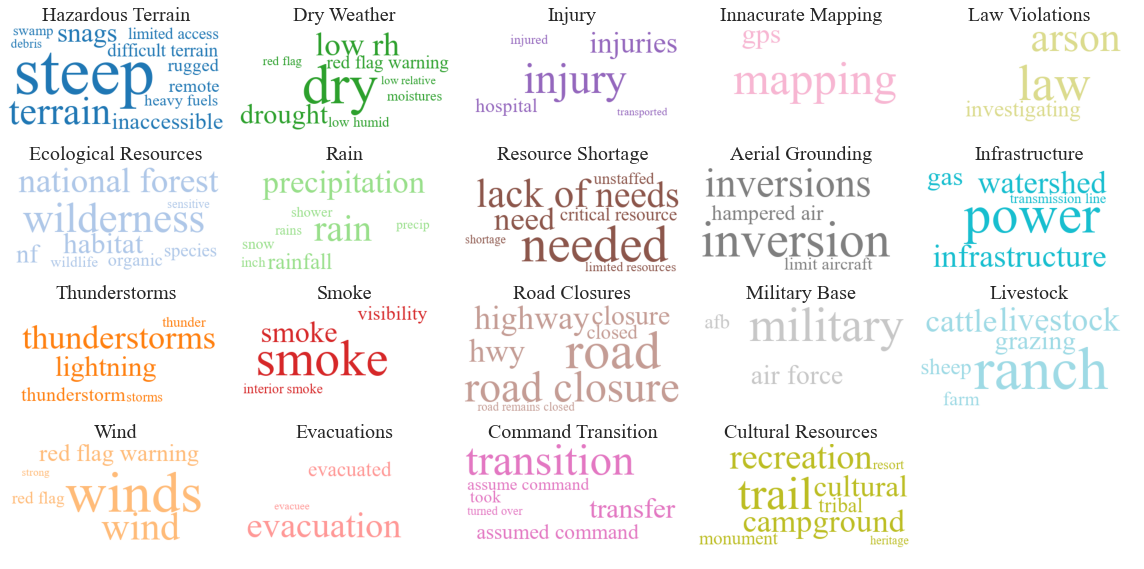

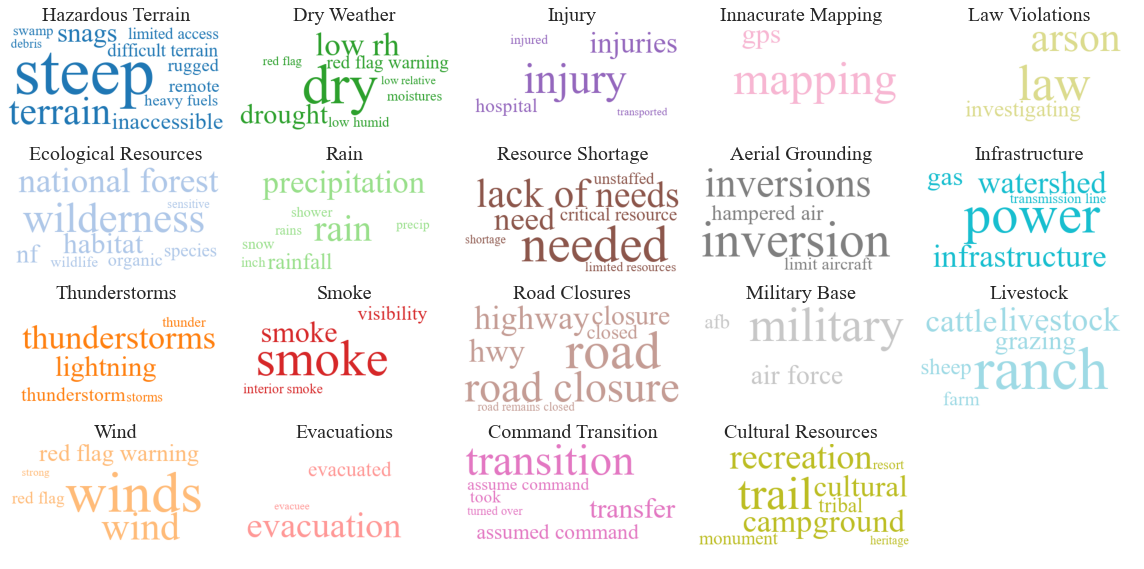

In [16]:
build_word_clouds(word_frequencies, nrows=4, ncols=5, figsize=(16, 8), cmap=None, save=True, save_path=os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jul-15-2022',''), fontsize=20)

## Primary Analysis: Hazard Metrics

In [17]:
fires = {hazard: fires[hazard] for hazard in hazards_sorted}

In [18]:
severity_total, severity_table = calc_severity(fires, incident_summary_df)
#severity_table

In [19]:
severity_table

Hazard  Average Severity  std dev Severity  \
0      Hazardous Terrain             0.681             1.112   
1   Ecological Resources             1.869             2.789   
2          Thunderstorms             1.104             1.693   
3                   Wind             0.662             1.104   
4            Dry Weather             1.032             1.675   
5                   Rain             0.511             0.983   
6                  Smoke             0.942             1.611   
7            Evacuations             3.792             5.058   
8                 Injury             3.727             3.779   
9      Resource Shortage             1.890             2.729   
10         Road Closures             1.580             2.190   
11    Command Transition             1.653             2.229   
12    Innacurate Mapping             1.093             1.704   
13      Aerial Grounding             8.125             9.112   
14         Military Base             1.657             2.756   
15    Cultural Resources             1.989             2.771   
16        Law Violations             0.773             1.003   
17        Infrastructure             2.141             3.153   
18             Livestock             2.573             3.779   

    Average Injuries  std dev Injuries  Average Fatalities  \
0              1.429             3.906               0.029   
1              2.544             5.669               0.037   
2              1.836             4.802               0.040   
3              1.289             3.872               0.030   
4              1.524             4.247               0.031   
5              1.173             3.421               0.030   
6              1.818             4.978               0.035   
7              2.508             5.514               0.061   
8              3.872             6.219               0.065   
9              2.399             5.401               0.046   
10             2.043             4.843               0.038   
11             2.248             4.903               0.050   
12             1.759             4.629               0.021   
13             6.349             9.694               0.107   
14             2.916             6.758               0.096   
15             2.598             5.357               0.038   
16             0.951             3.126               0.061   
17             2.409             6.022               0.064   
18             2.568             6.301               0.068   

    std dev Fatalities  Average Structures Damaged  \
0                0.453                       0.793   
1                0.405                       1.540   
2                0.480                       1.100   
3                0.481                       1.119   
4                0.491                       1.427   
5                0.545                       1.189   
6                0.460                       1.422   
7                0.713                       2.487   
8                0.476                       1.941   
9                0.639                       1.545   
10               0.442                       1.868   
11               0.606                       1.714   
12               0.238                       1.016   
13               0.845                       5.282   
14               0.506                       1.060   
15               0.396                       1.457   
16               0.586                       1.527   
17               0.758                       2.641   
18               0.542                       0.938   

    std dev Structures Damaged  Average Structures Destroyed  \
0                       10.143                         4.547   
1                       18.440                         6.371   
2                       15.613                         5.047   
3                       12.094                         6.156   
4                       13.787                         7.592   
5                       14.328 

Hazard  Average Severity  std dev Severity  \
0      Hazardous Terrain             0.681             1.112   
1   Ecological Resources             1.869             2.789   
2          Thunderstorms             1.104             1.693   
3                   Wind             0.662             1.104   
4            Dry Weather             1.032             1.675   
5                   Rain             0.511             0.983   
6                  Smoke             0.942             1.611   
7            Evacuations             3.792             5.058   
8                 Injury             3.727             3.779   
9      Resource Shortage             1.890             2.729   
10         Road Closures             1.580             2.190   
11    Command Transition             1.653             2.229   
12    Innacurate Mapping             1.093             1.704   
13      Aerial Grounding             8.125             9.112   
14         Military Base             1.657             2.756   
15    Cultural Resources             1.989             2.771   
16        Law Violations             0.773             1.003   
17        Infrastructure             2.141             3.153   
18             Livestock             2.573             3.779   

    Average Injuries  std dev Injuries  Average Fatalities  \
0              1.429             3.906               0.029   
1              2.544             5.669               0.037   
2              1.836             4.802               0.040   
3              1.289             3.872               0.030   
4              1.524             4.247               0.031   
5              1.173             3.421               0.030   
6              1.818             4.978               0.035   
7              2.508             5.514               0.061   
8              3.872             6.219               0.065   
9              2.399             5.401               0.046   
10             2.043             4.843               0.038   
11             2.248             4.903               0.050   
12             1.759             4.629               0.021   
13             6.349             9.694               0.107   
14             2.916             6.758               0.096   
15             2.598             5.357               0.038   
16             0.951             3.126               0.061   
17             2.409             6.022               0.064   
18             2.568             6.301               0.068   

    std dev Fatalities  Average Structures Damaged  \
0                0.453                       0.793   
1                0.405                       1.540   
2                0.480                       1.100   
3                0.481                       1.119   
4                0.491                       1.427   
5                0.545                       1.189   
6                0.460                       1.422   
7                0.713                       2.487   
8                0.476                       1.941   
9                0.639                       1.545   
10               0.442                       1.868   
11               0.606                       1.714   
12               0.238                       1.016   
13               0.845                       5.282   
14               0.506                       1.060   
15               0.396                       1.457   
16               0.586                       1.527   
17               0.758                       2.641   
18               0.542                       0.938   

    std dev Structures Damaged  Average Structures Destroyed  \
0                       10.143                         4.547   
1                       18.440                         6.371   
2                       15.613                         5.047   
3                       12.094                         6.156   
4                       13.787                         7.592   
5                       14.328 

In [20]:
severity_accross_all_incidents = []; injuries_all = []; fatalities_all = []; str_dam_all = []; str_des_all = []
for i in range(len(incident_summary_df)):
    severity = int(incident_summary_df.iloc[i]["STR_DESTROYED_TOTAL"]) + int(incident_summary_df.iloc[i]["STR_DAMAGED_TOTAL"])+ int(incident_summary_df.iloc[i]["INJURIES_TOTAL"])+ int(incident_summary_df.iloc[i]["FATALITIES"])
    severity_accross_all_incidents.append(severity)
    injuries_all.append(int(incident_summary_df.iloc[i]["INJURIES_TOTAL"])); fatalities_all.append(int(incident_summary_df.iloc[i]["FATALITIES"]))
    str_dam_all.append(int(incident_summary_df.iloc[i]["STR_DAMAGED_TOTAL"])); str_des_all.append(int(incident_summary_df.iloc[i]["STR_DESTROYED_TOTAL"]))
#print(len(severity_accross_all_incidents))
severity_accross_all_incidents = remove_outliers(severity_accross_all_incidents)
#injuries_all = remove_outliers(injuries_all)
#fatalities_all = remove_outliers(fatalities_all)
#str_dam_all = remove_outliers(str_dam_all)
#str_des_all = remove_outliers(str_des_all)
#print(len(severity_accross_all_incidents))
#print(str(round(np.average(severity_accross_all_incidents),3))+"+-"+str(round(np.std(severity_accross_all_incidents),3)))

In [21]:
total_incidents_df = pd.DataFrame({"Hazard Category": ['Total Reports'],
                                  "Hazard Name": [''],
                                  "OTTO %":[''],
                                   "Total Fire Frequency":[str(len(incident_summary_df))],
                                  "Rate":[str(len(incident_summary_df)/len(years))],
                                  "Fatalities":[str(round(np.average(fatalities_all),3))+"+-"+str(round(np.std(fatalities_all),3))],
                                  "Injuries":[str(round(np.average(injuries_all),3))+"+-"+str(round(np.std(injuries_all),3))],
                                  "Structures Damaged":[str(round(np.average(str_dam_all),3))+"+-"+str(round(np.std(str_dam_all),3))],
                                  "Structures Destroyed":[str(round(np.average(str_des_all),3))+"+-"+str(round(np.std(str_des_all),3))],
                                  "Severity":[str(round(np.average(severity_accross_all_incidents),3))+"+-"+str(round(np.std(severity_accross_all_incidents),3))]},
                                 index =['Total Reports'])

In [22]:
values = ['Fatalities', 'Injuries', 'Structures Damaged', 'Structures Destroyed']
for value in values:
    table[value] = severity_table['Average '+value].astype(str) + "+-" + severity_table['std dev '+value].astype(str)

In [23]:
table['Severity'] = severity_table['formatted']
columns = ['Hazard Category', 'Hazard Name', 'OTTO %', 'Total Fire Frequency', 'Rate'] + values +['Severity']
table = table[columns]
table = table.set_index('Hazard Category')
table = table.append(total_incidents_df)
display(table)

Hazard Name          OTTO %  \
Environment                  Hazardous Terrain  53.279+-36.489   
Environment               Ecological Resources  46.753+-35.071   
Environment                      Thunderstorms  55.051+-35.843   
Environment                               Wind  51.774+-36.278   
Environment                        Dry Weather  55.363+-36.294   
Environment                               Rain  65.165+-37.268   
Environment                              Smoke   48.607+-37.48   
Mission                            Evacuations   36.047+-30.96   
Mission                                 Injury  55.992+-34.287   
Mission                      Resource Shortage  40.208+-33.697   
Mission                          Road Closures   44.484+-34.59   
Mission                     Command Transition  60.793+-38.225   
Mission                     Innacurate Mapping  66.382+-33.904   
Mission                       Aerial Grounding  29.807+-23.723   
Wildland Urban Interface         Military Base   59.63+-34.783   
Wildland Urban Interface    Cultural Resources  44.906+-34.956   
Wildland Urban Interface        Law Violations  78.156+-31.313   
Wildland Urban Interface        Infrastructure  50.232+-35.028   
Wildland Urban Interface             Livestock  40.153+-34.933   
Total Reports                                                    

                         Total Fire Frequency              Rate    Fatalities  \
Environment                              2900  322.222+-120.937  0.029+-0.453   
Environment                               792      88.0+-29.178  0.037+-0.405   
Environment                              1127   125.222+-51.159    0.04+-0.48   
Environment                              2950  327.778+-120.225   0.03+-0.481   
Environment                              2171     241.222+-92.6  0.031+-0.491   
Environment                              1696   188.444+-42.729   0.03+-0.545   
Environment                              1281   142.333+-33.397   0.035+-0.46   
Mission                                  1296     144.0+-58.357  0.061+-0.713   
Mission                                   783      87.0+-31.675  0.065+-0.476   
Mission                                  1229    136.556+-58.34  0.046+-0.639   
Mission                                  1726   191.778+-67.621  0.038+-0.442   
Mission                                  1868   207.556+-55.042   0.05+-0.606   
Mission                                  1383   153.667+-47.549  0.021+-0.238   
Mission                                   149     16.556+-7.603  0.107+-0.845   
Wildland Urban Interface                   83      9.222+-3.457  0.096+-0.506   
Wildland Urban Interface                  865    96.111+-29.659  0.038+-0.396   
Wildland Urban Interface                  328    36.444+-21.376  0.061+-0.586   
Wildland Urban Interface                  877    97.444+-35.356  0.064+-0.758   
Wildland Urban Interface                  530    58.889+-31.221  0.068+-0.542   
Total Reports                            8991             999.0  0.015+-0.293   

                              Injuries Structures Damaged  \
Environment               1.429+-3.906      0.793+-10.143   
Environment               2.544+-5.669        1.54+-18.44   
Environment               1.836+-4.802        1.1+-15.613   
Environment               1.289+-3.872      1.119+-12.094   
Environment               1.524+-4.247      1.427+-13.787   
Environment               1.173+-3.421      1.189+-14.328   
Environment               1.818+-4.978      1.422+-15.315   
Mission                   2.508+-5.514      2.487+-17.956   
Mission                   3.872+-6.219      1.941+-18.525   
Mission                   2.399+-5.401      1.545+-15.509   
Mission                   2.043+-4.843      1.868+-16.039   
Mission                   2.248+-4.903      1.714+-15.379   
Mission                   1.759+-4.629       1.016+-9.631   
Mission                   6.349+-9.694      5.282+-40.208   
Wildland Urban Interface  2.916

Hazard Name          OTTO %  \
Environment                  Hazardous Terrain  53.279+-36.489   
Environment               Ecological Resources  46.753+-35.071   
Environment                      Thunderstorms  55.051+-35.843   
Environment                               Wind  51.774+-36.278   
Environment                        Dry Weather  55.363+-36.294   
Environment                               Rain  65.165+-37.268   
Environment                              Smoke   48.607+-37.48   
Mission                            Evacuations   36.047+-30.96   
Mission                                 Injury  55.992+-34.287   
Mission                      Resource Shortage  40.208+-33.697   
Mission                          Road Closures   44.484+-34.59   
Mission                     Command Transition  60.793+-38.225   
Mission                     Innacurate Mapping  66.382+-33.904   
Mission                       Aerial Grounding  29.807+-23.723   
Wildland Urban Interface         Military Base   59.63+-34.783   
Wildland Urban Interface    Cultural Resources  44.906+-34.956   
Wildland Urban Interface        Law Violations  78.156+-31.313   
Wildland Urban Interface        Infrastructure  50.232+-35.028   
Wildland Urban Interface             Livestock  40.153+-34.933   
Total Reports                                                    

                         Total Fire Frequency              Rate    Fatalities  \
Environment                              2900  322.222+-120.937  0.029+-0.453   
Environment                               792      88.0+-29.178  0.037+-0.405   
Environment                              1127   125.222+-51.159    0.04+-0.48   
Environment                              2950  327.778+-120.225   0.03+-0.481   
Environment                              2171     241.222+-92.6  0.031+-0.491   
Environment                              1696   188.444+-42.729   0.03+-0.545   
Environment                              1281   142.333+-33.397   0.035+-0.46   
Mission                                  1296     144.0+-58.357  0.061+-0.713   
Mission                                   783      87.0+-31.675  0.065+-0.476   
Mission                                  1229    136.556+-58.34  0.046+-0.639   
Mission                                  1726   191.778+-67.621  0.038+-0.442   
Mission                                  1868   207.556+-55.042   0.05+-0.606   
Mission                                  1383   153.667+-47.549  0.021+-0.238   
Mission                                   149     16.556+-7.603  0.107+-0.845   
Wildland Urban Interface                   83      9.222+-3.457  0.096+-0.506   
Wildland Urban Interface                  865    96.111+-29.659  0.038+-0.396   
Wildland Urban Interface                  328    36.444+-21.376  0.061+-0.586   
Wildland Urban Interface                  877    97.444+-35.356  0.064+-0.758   
Wildland Urban Interface                  530    58.889+-31.221  0.068+-0.542   
Total Reports                            8991             999.0  0.015+-0.293   

                              Injuries Structures Damaged  \
Environment               1.429+-3.906      0.793+-10.143   
Environment               2.544+-5.669        1.54+-18.44   
Environment               1.836+-4.802        1.1+-15.613   
Environment               1.289+-3.872      1.119+-12.094   
Environment               1.524+-4.247      1.427+-13.787   
Environment               1.173+-3.421      1.189+-14.328   
Environment               1.818+-4.978      1.422+-15.315   
Mission                   2.508+-5.514      2.487+-17.956   
Mission                   3.872+-6.219      1.941+-18.525   
Mission                   2.399+-5.401      1.545+-15.509   
Mission                   2.043+-4.843      1.868+-16.039   
Mission                   2.248+-4.903      1.714+-15.379   
Mission                   1.759+-4.629       1.016+-9.631   
Mission                   6.349+-9.694      5.282+-40.208   
Wildland Urban Interface  2.916

In [24]:
print(table.to_latex())

\begin{tabular}{lllllllllll}
\toprule
{} &           Hazard Name &          OTTO \% & Total Fire Frequency &              Rate &    Fatalities &      Injuries & Structures Damaged & Structures Destroyed &      Severity & Hazard Category \\
\midrule
Environment              &     Hazardous Terrain &  53.279+-36.489 &                 2900 &  322.222+-120.937 &  0.029+-0.453 &  1.429+-3.906 &      0.793+-10.143 &        4.547+-41.059 &  0.681+-1.112 &             NaN \\
Environment              &  Ecological Resources &  46.753+-35.071 &                  792 &      88.0+-29.178 &  0.037+-0.405 &  2.544+-5.669 &        1.54+-18.44 &        6.371+-34.284 &  1.869+-2.789 &             NaN \\
Environment              &         Thunderstorms &  55.051+-35.843 &                 1127 &   125.222+-51.159 &    0.04+-0.48 &  1.836+-4.802 &        1.1+-15.613 &        5.047+-33.552 &  1.104+-1.693 &             NaN \\
Environment              &                  Wind &  51.774+-36.278 &              

In [25]:
avg_injuries = round(np.average(injuries_all))
avg_fatalities = round(np.average(fatalities_all))
avg_des = round(np.average(str_des_all))
avg_dam = round(np.average(str_dam_all))
avg_df = pd.DataFrame({"Total Avg Injuries":[avg_injuries for hazard in hazards],
                     "Total Avg Fatalities":[avg_fatalities for hazard in hazards],
                     "Total Avg Str Dam":[avg_dam for hazard in hazards],
                     "Total Avg Str Des":[avg_des for hazard in hazards]})

In [26]:
ICS_results = pd.concat([pd.DataFrame(table_data), severity_table, avg_df], axis=1)
#ICS_results.to_csv(os.path.join(os.path.dirname(os.getcwd()),'results','ICS_hazards.csv'))

## Graphic Analysis: Time Series
- Hazard Metrics: OTTO, Severity, Frequency 
- Predictors

### Hazard Metrics Time Series
frequency, OTTO in pct containment, severity

In [27]:
categories = table['Hazard Category'][:-1].index
metric_data = [time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires]
time_of_occurence_days = {hazard: time_of_occurence_days[hazard] for hazard in hazards_sorted}
time_of_occurence_pct_contained = {hazard: time_of_occurence_pct_contained[hazard] for hazard in hazards_sorted}
frequency = {hazard: frequency[hazard] for hazard in hazards_sorted}
frequency_fires = {hazard: frequency_fires[hazard] for hazard in hazards_sorted}

In [28]:
categories

Index(['Environment', 'Environment', 'Environment', 'Environment',
       'Environment', 'Environment', 'Environment', 'Mission', 'Mission',
       'Mission', 'Mission', 'Mission', 'Mission', 'Mission',
       'Wildland Urban Interface', 'Wildland Urban Interface',
       'Wildland Urban Interface', 'Wildland Urban Interface',
       'Wildland Urban Interface'],
      dtype='object')

Index(['Environment', 'Environment', 'Environment', 'Environment',
       'Environment', 'Environment', 'Environment', 'Mission', 'Mission',
       'Mission', 'Mission', 'Mission', 'Mission', 'Mission',
       'Wildland Urban Interface', 'Wildland Urban Interface',
       'Wildland Urban Interface', 'Wildland Urban Interface',
       'Wildland Urban Interface'],
      dtype='object')

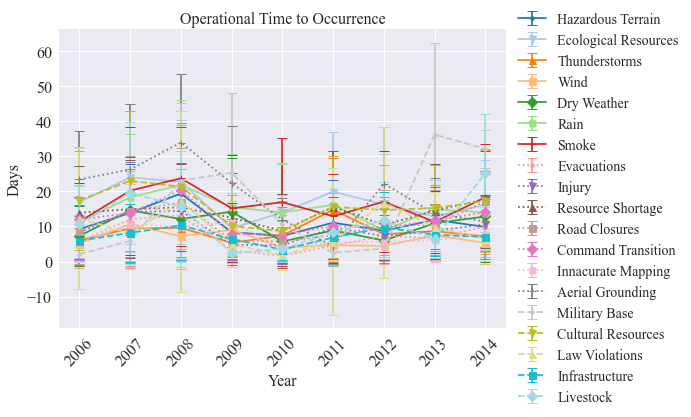

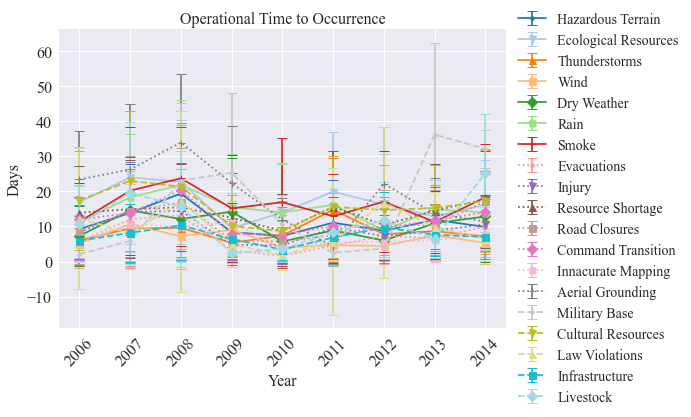

C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srandrad\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)

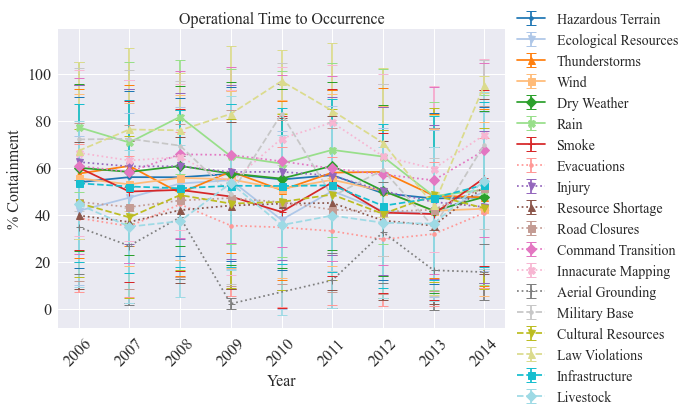

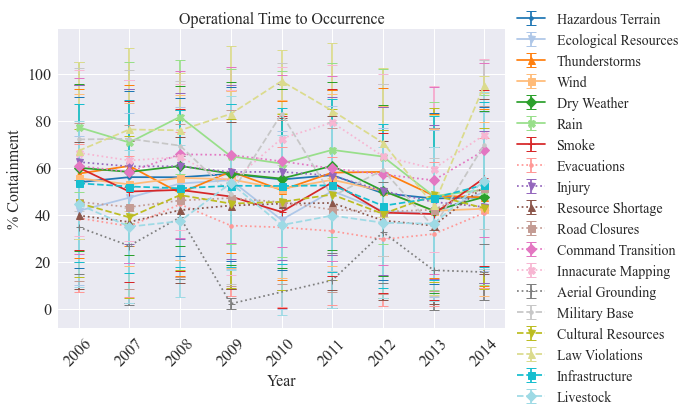

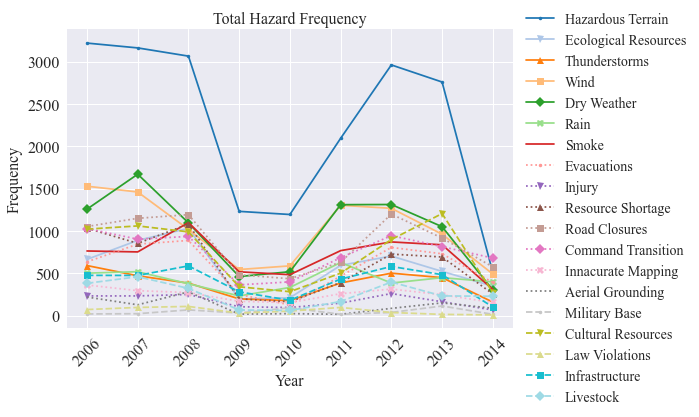

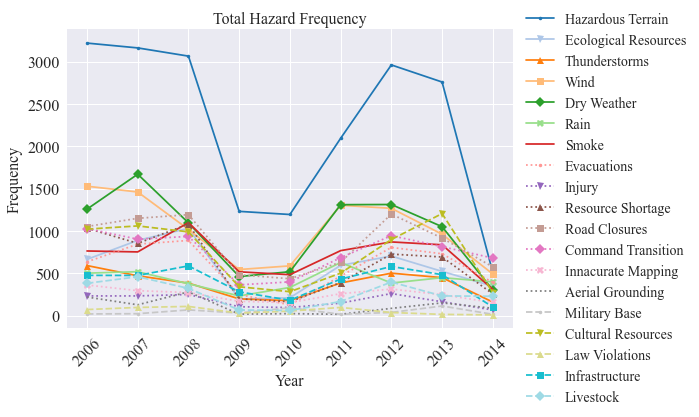

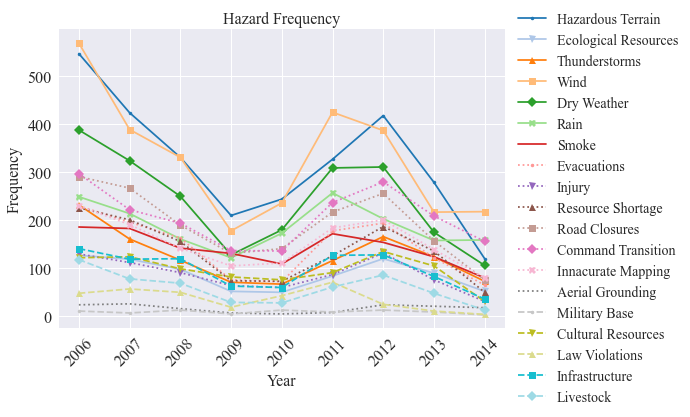

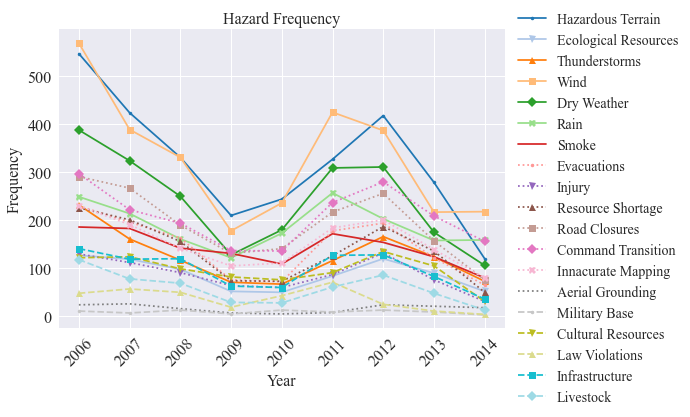

In [29]:
#sort by category? 
graph_ICS_time_series(time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires, hazards, categories)

In [30]:
frequencies_fire = {hazard: [frequency_fires[hazard][year] for year in frequency_fires[hazard]] for hazard in frequency_fires}
fire_freqs_scaled = {hazard: minmax_scale(frequencies_fire[hazard]) for hazard in frequencies_fire}

### Predictor Time Series
- fire characteristics
- operations
- intensity

In [31]:
def combine_predictors(predictors=[], scale=True):
    max_weight = 1/len(predictors)
    num_values = len(predictors[-1])
    if scale: 
        variable_weights = [minmax_scale(p) for p in predictors]
    else:
        variable_weights = predictors
    combined_vars = [[max_weight*var_weight for var_weight in var_weight_list] for var_weight_list in variable_weights]
    combined_vars = [sum([combined_vars[var][i] for var in range(len(combined_vars))]) for i in range(num_values)]
    return combined_vars

In [32]:
combined_predictors = pd.DataFrame()

#### Fire Characteristics
examining trends in frequency, acres burned, and the number of days a fire burns on average per year. Potentially add FSR (WF_MAX_FSR), number of complexes (COMPLEX), evacuations (EVACUATION_REPORTED)


In [33]:
fire_trends_cols = ["FINAL_ACRES", "FOD_DISCOVERY_DOY", "FOD_CONTAIN_DOY", "START_YEAR"]
fire_trends_df = incident_summary_df[fire_trends_cols]

In [34]:
counts = fire_trends_df["START_YEAR"].value_counts()
count = {int(year):counts[year] for year in counts.index.sort_values()}

In [35]:
years = count.keys()

In [36]:
average_days_burning = {}
total_days_burning = {}
total_acres = {}
average_acres = {}
for year in years:
    temp_df = fire_trends_df.loc[fire_trends_df['START_YEAR']==year]
    list_of_days_burning = [temp_df.iloc[i]["FOD_CONTAIN_DOY"]-temp_df.iloc[i]['FOD_DISCOVERY_DOY'] for i in range(len(temp_df.dropna(subset=['FOD_DISCOVERY_DOY', "FOD_CONTAIN_DOY"]).reset_index(drop=True)))]
    average_days_burning[year] = np.average(list_of_days_burning)
    total_days_burning[year] = np.sum(list_of_days_burning)
    list_of_acres = temp_df['FINAL_ACRES'].dropna().tolist()
    average_acres[year] = np.average(list_of_acres)
    total_acres[year] = np.sum(list_of_acres)
#print(total_days_burning)

In [37]:
fire_predictors = [total_acres.values(), counts, total_days_burning.values()]

In [38]:
fire_predictors = [total_acres.values(), counts, total_days_burning.values()]
combined_predictors['Fire Characteristics'] = combine_predictors(fire_predictors)
combined_predictors.index = years

#### Graphs

In [39]:
av_acres = average_acres.values()
av_days_burn = average_days_burning.values()
count = count.values()
freq_scaled = minmax_scale(count)
av_days_burn_scaled = minmax_scale(av_days_burn)
av_acres_scaled = minmax_scale(av_acres)

total_days_burn = total_days_burning.values()
total_acre = total_acres.values()
total_days_burn_scaled = minmax_scale(total_days_burn)
total_acres_scaled = minmax_scale(total_acre)

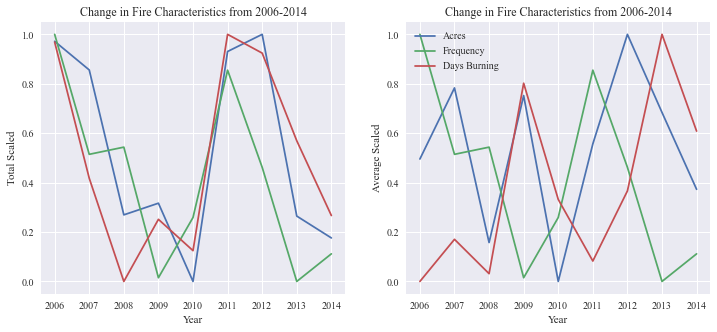

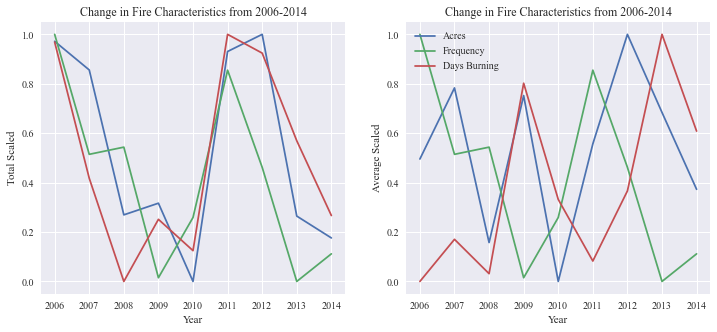

In [40]:
figsize = (12,5)
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows = nrows,
                            ncols = ncols,
                            figsize = figsize)
fire_labels = ['Acres', 'Frequency', 'Days Burning']
fire_totals = [total_acres_scaled, freq_scaled, total_days_burn_scaled]
fire_avgs = [av_acres_scaled, freq_scaled, av_days_burn_scaled]
fig, axs[0] = plot_predictors(fire_totals, fire_labels, time=years, time_label='Year', title="Change in Fire Characteristics from 2006-2014", 
                totals=True, averages=False, scaled=True, figsize=(12, 5), axs=axs[0], fig=fig, show=False, legend=False)
fig, axs[1] = plot_predictors(fire_avgs, fire_labels, time=years, time_label='Year', title="Change in Fire Characteristics from 2006-2014", 
                totals=False, averages=True, scaled=True, figsize=(12, 5), axs=axs[1], fig=fig, show=False)
plt.show()

#### Operations

operational trends are examined as aerial assets (total and max in one day), personnel (total and max in one day), and projected cost.
potentially add number of sit reports (INC_MGMT_NUM_SITREPS)??

In [41]:
operational_trends_cols = ["TOTAL_AERIAL_SUM", "TOTAL_PERSONNEL_SUM", "WF_PEAK_AERIAL", "WF_PEAK_PERSONNEL", "START_YEAR","PROJECTED_FINAL_IM_COST"]
operational_trends_df = incident_summary_df[operational_trends_cols]

In [42]:
total_aerial = {}
average_aerial = {}
total_person = {}
average_person = {}
total_cost = {}
average_cost = {}
for year in years:
    list_of_person = []
    list_of_aerial = []
    temp_df = operational_trends_df.loc[operational_trends_df['START_YEAR']==year]
    list_of_person = temp_df['WF_PEAK_PERSONNEL'].fillna(value=0).tolist()
    list_of_aerial = temp_df["WF_PEAK_AERIAL"].fillna(value=0).tolist()
    list_of_cost = temp_df["PROJECTED_FINAL_IM_COST"].dropna().tolist()
    average_aerial[year] = np.average(list_of_aerial)
    total_aerial[year] = np.sum(list_of_aerial)
    average_person[year] = np.average(list_of_person)
    total_person[year] = np.sum(list_of_person)
    average_cost[year] = np.average(list_of_cost)
    total_cost[year] = np.sum(list_of_cost)

In [43]:
ops_predictors = [total_cost.values(), total_aerial.values(), total_person.values()]
combined_predictors['Operations'] = combine_predictors(ops_predictors)

In [44]:
av_aerial = average_aerial.values()
total_aerial = total_aerial.values()

av_person = average_person.values()
total_person = total_person.values()
av_cost = average_cost.values()
total_cost = total_cost.values()

#### Graphs

In [45]:
av_cost_scaled = minmax_scale(av_cost)
av_person_scaled = minmax_scale(av_person)
av_aerial_scaled = minmax_scale(av_aerial)

total_cost_scaled = minmax_scale(total_cost)
total_person_scaled = minmax_scale(total_person)
total_aerial_scaled = minmax_scale(total_aerial)

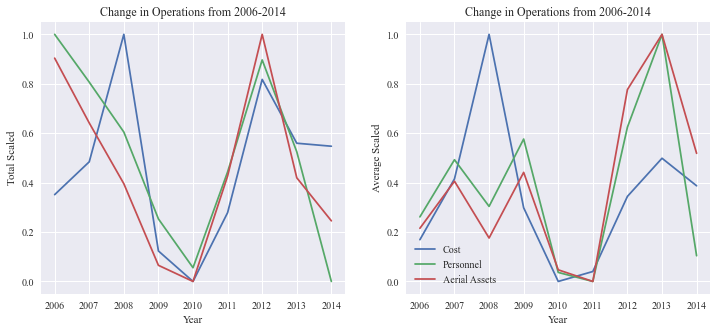

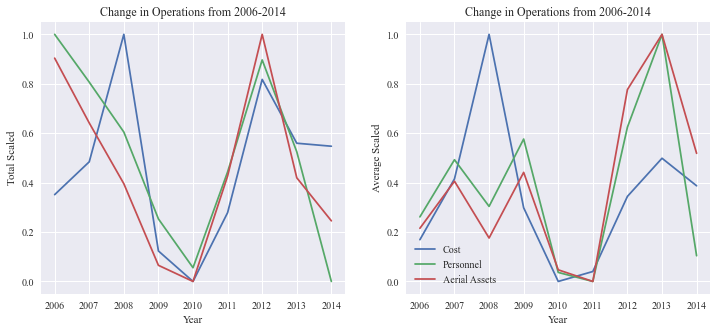

In [46]:
figsize = (12,5)
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows = nrows,
                            ncols = ncols,
                            figsize = figsize)
operations_labels = ['Cost', 'Personnel', 'Aerial Assets']
operations_totals = [total_cost_scaled, total_person_scaled, total_aerial_scaled]
operations_avgs = [av_cost_scaled, av_person_scaled, av_aerial_scaled]
fig, axs[0] = plot_predictors(operations_totals, operations_labels, time=years, time_label='Year', title="Change in Operations from 2006-2014", 
                totals=True, averages=False, scaled=True, figsize=(12, 5), axs=axs[0], fig=fig, show=False, legend=False)
fig, axs[1] = plot_predictors(operations_avgs, operations_labels, time=years, time_label='Year', title="Change in Operations from 2006-2014", 
                totals=False, averages=True, scaled=True, figsize=(12, 5), axs=axs[1], fig=fig, show=False)
plt.show()

#### Intensity
intensity is looked at as the number of injuries, number of fatalities, number of structures damaged, number of structures destroyed

In [47]:
intensity_cols = ["STR_DESTROYED_TOTAL","STR_DAMAGED_TOTAL","INJURIES_TOTAL","FATALITIES", "START_YEAR"]
intensity_df = incident_summary_df[intensity_cols]
#intensity_df

In [48]:
total_str_des = {}
average_str_des = {}
total_str_damage = {}
average_str_damage = {}
total_injuries = {}
average_injuries = {}
total_fatalities = {}
average_fatalities = {}

for year in years:
    temp_df =intensity_df.loc[intensity_df['START_YEAR']==year]
    list_of_dest = temp_df["STR_DESTROYED_TOTAL"].tolist()
    list_of_dam = temp_df["STR_DAMAGED_TOTAL"].tolist()
    list_of_injury = temp_df["INJURIES_TOTAL"].tolist()
    list_of_fatalities = temp_df["FATALITIES"].tolist()
    total_str_des[year] = np.sum(list_of_dest)
    average_str_des[year] = np.average(list_of_dest)
    total_str_damage[year] = np.sum(list_of_dam)
    average_str_damage[year] = np.average(list_of_dam)
    total_injuries[year] = np.sum(list_of_injury)
    average_injuries[year] = np.average(list_of_injury)
    total_fatalities[year] = np.sum(list_of_fatalities)
    average_fatalities[year] = np.average(list_of_fatalities)

In [49]:
intensity_predictors = [total_fatalities.values(), total_str_damage.values(), total_injuries.values(), total_str_des.values()]
combined_predictors['Intensity'] = combine_predictors(intensity_predictors)

In [50]:
av_des = average_str_des.values()
total_des = total_str_des.values()
av_damage = average_str_damage.values()
total_damage = total_str_damage.values()
av_injury = average_injuries.values()
total_injury = total_injuries.values()
av_fatality = average_fatalities.values()
total_fatality = total_fatalities.values()

#### Graphs

In [51]:
total_fatality_scaled = minmax_scale(total_fatality)
total_injury_scaled = minmax_scale(total_injury)
total_damage_scaled = minmax_scale(total_damage)
total_des_scaled = minmax_scale(total_des)

av_fatality_scaled = minmax_scale(av_fatality)
av_injury_scaled = minmax_scale(av_injury)
av_damage_scaled = minmax_scale(av_damage)
av_des_scaled = minmax_scale(av_des)

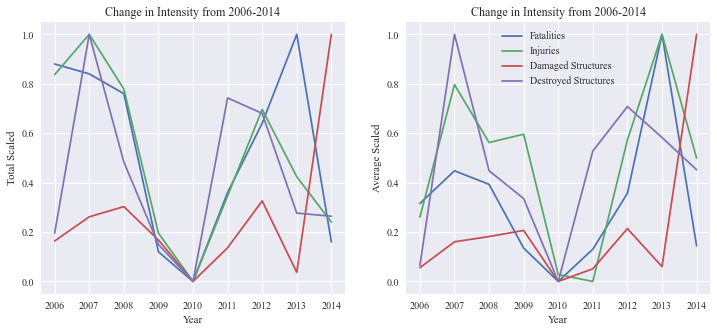

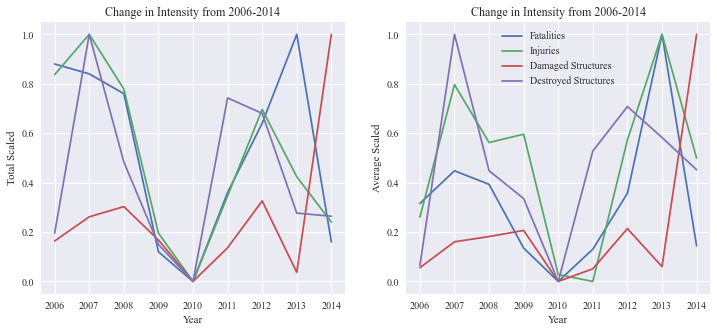

In [52]:
figsize = (12,5)
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows = nrows,
                            ncols = ncols,
                            figsize = figsize)
intensity_labels = ['Fatalities', 'Injuries', 'Damaged Structures', 'Destroyed Structures']
intensity_totals = [total_fatality_scaled, total_injury_scaled, total_damage_scaled, total_des_scaled]
intensity_avgs = [av_fatality_scaled, av_injury_scaled, av_damage_scaled, av_des_scaled]
fig, axs[0] = plot_predictors(intensity_totals, intensity_labels, time=years, time_label='Year', title="Change in Intensity from 2006-2014", 
                totals=True, averages=False, scaled=True, figsize=(12, 5), axs=axs[0], fig=fig, show=False, legend=False)
fig, axs[1] = plot_predictors(intensity_avgs, intensity_labels, time=years, time_label='Year', title="Change in Intensity from 2006-2014", 
                totals=False, averages=True, scaled=True, figsize=(12, 5), axs=axs[1], fig=fig, show=False)
plt.show()

#### Predictors Correlation Matrix

In [53]:
totals = {"Fire Frequency": count,
    "total Days Fires Burned": total_days_burn,
    "total Acres Fires Burned": total_acre,
    "total Aerial Assets": total_aerial,
    "total Personnel": total_person,
    "total Cost": total_cost,
    "total Structures Damaged": total_damage,
    "total Structures Destroyed": total_des,
    "total Injuries": total_injury,
    "total Fatalities": total_fatality}
totals_df = pd.DataFrame(totals)

averages = {
    "fire frequency": count,
    "average days fire burns": av_days_burn,
    "average acres fire burns": av_acres,
    "average aerial assets per fire": av_aerial,
    "average personnel per fire": av_person,
    "average cost per fire": av_cost,
    "average structures damaged per fire": av_damage,
    "average structures destroyed per fire": av_des,
    "average injuries per fire": av_injury,
    "average fatalities per fire": av_fatality}
avs_df = pd.DataFrame(averages)

totals_scaled = {feature:minmax_scale(totals[feature]) for feature in totals}


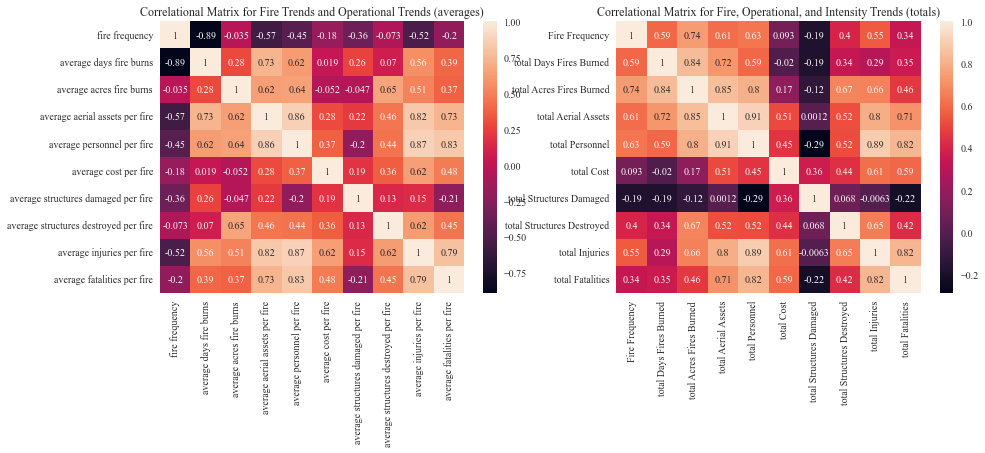

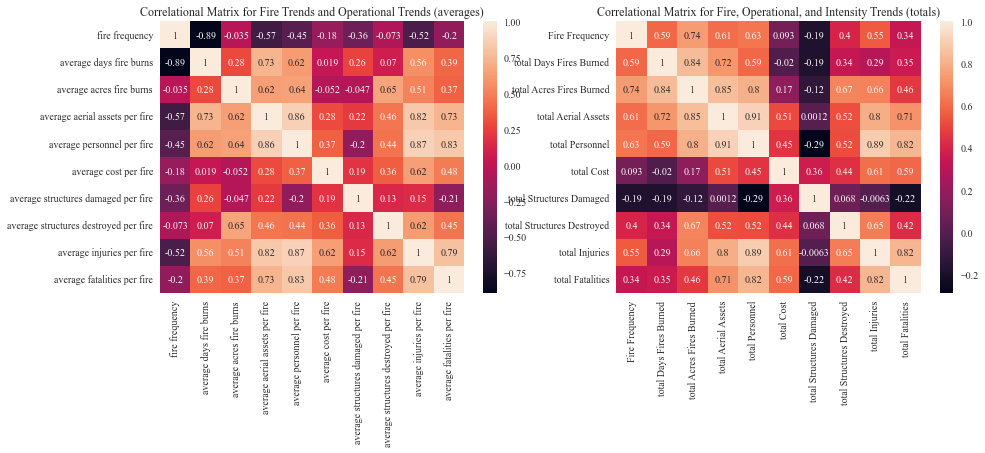

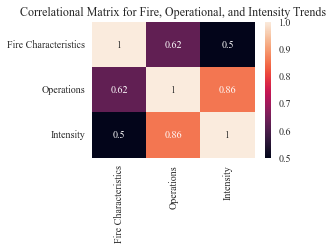

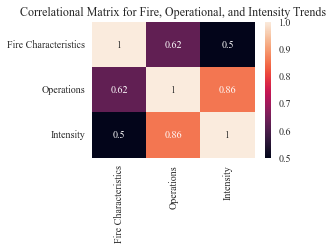

In [54]:
corrMatrix_avs = avs_df.corr()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sn.heatmap(corrMatrix_avs, annot=True)
plt.title("Correlational Matrix for Fire Trends and Operational Trends (averages)")

plt.subplot(1, 2, 2)
corrMatrix_totals = totals_df.corr()
sn.heatmap(corrMatrix_totals, annot=True)
plt.title("Correlational Matrix for Fire, Operational, and Intensity Trends (totals)")
plt.show()


plt.subplot(2, 2, 1)
corrMatrix_combined = combined_predictors.corr()
sn.heatmap(corrMatrix_combined, annot=True)
plt.title("Correlational Matrix for Fire, Operational, and Intensity Trends")
plt.show()

In [55]:
combined_predictors_scaled = combined_predictors.copy()
for col in combined_predictors_scaled:
    combined_predictors_scaled[col] = minmax_scale(combined_predictors_scaled[col])

As seen above, fire frequency is negatively correlated with assets, indicating higher frequencies may be smaller fires, where lower frequencies are related to larger fires, thus more assets. 

The average days the fire burns is weakly correlated with max assets, would likely be closer correlated with total assets accross an operation. Negatively correlated with fire frequency, indication longer fires occur less frequently.

average acres burned is moderately positively correlated with assets, but for some reason is negatively correlated with days burning (could be due to outliers)

average maximum aerial assets is strongest correlated with personnel, which makes sense. Also positively correlated with acres burned, days burning, and cost, indicating more aerial support is needed in more intense fires.

average maximum personnel is positively correlated with acres burned and days burning

cost is most strongly associated with days burning, assets, and personnel, but it is still moderate. Cost can likely be explained better by number of structures damages

In [56]:
lines = {"Fire Frequency": '--',
    "total Days Fires Burned": '--',
    "total Acres Fires Burned": '--',
    "total Aerial Assets": '-',
    "total Personnel": '-',
    "total Cost": '-',
    "total Structures Damaged": ':',
    "total Structures Destroyed": ':',
    "total Injuries": ':',
    "total Fatalities": ':'}
colors = cm.tab10(np.linspace(0, 1, len(lines)))
colors_dict = {}
i = 0
for feature in lines:
    colors_dict[feature] = colors[i]
    i+=1
markers = {"Fire Frequency": '.',
    "total Days Fires Burned": 'v',
    "total Acres Fires Burned": '^',
    "total Aerial Assets": 's',
    "total Personnel": 'p',
    "total Cost": 'P',
    "total Structures Damaged": 'h',
    "total Structures Destroyed": 'X',
    "total Injuries": 'D',
    "total Fatalities": '*'}

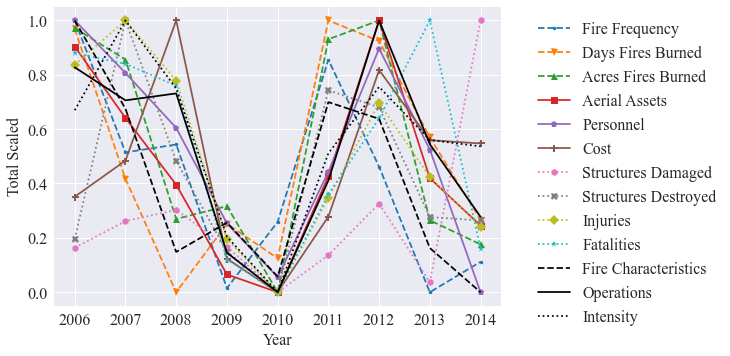

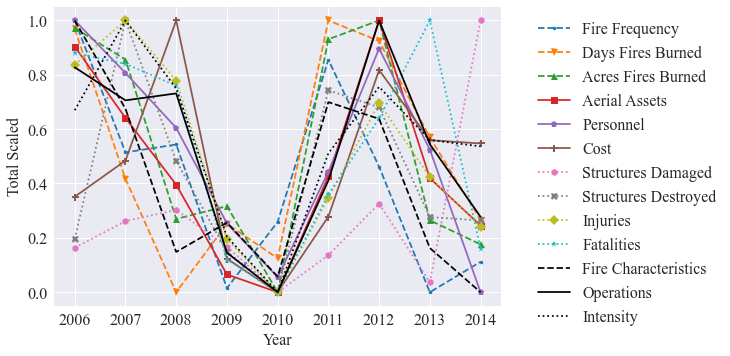

In [57]:
plt.figure()
plt.ylabel("Total Scaled", fontsize=16)
plt.xlabel("Year", fontsize=16)
#plt.title("Fire, Operations, and Intensity Trends from 2006-2014")
#years = [year.strip(".") for year in years]
for feature in totals_scaled:
    plt.plot(years, totals_scaled[feature], label=feature.replace("total ",""), linestyle=lines[feature], marker=markers[feature], color=colors_dict[feature])
    plt.tick_params(labelsize=16)
#plt.plot([],[], label='Fire Characteristics', color='black', linestyle='--')
#plt.plot([],[], label = 'Operations', color='black', linestyle = '-')
#plt.plot([],[], label = 'Intensity', color = 'black', linestyle = ':') 
plt.plot(years,combined_predictors_scaled['Fire Characteristics'], label='Fire Characteristics', color='black', linestyle='--')
plt.plot(years,combined_predictors_scaled['Operations'], label = 'Operations', color='black', linestyle = '-')
plt.plot(years,combined_predictors_scaled['Intensity'], label = 'Intensity', color = 'black', linestyle = ':')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()

In [58]:
combined_predictors_unscaled = pd.DataFrame()
fire_predictors = [total_acres.values(), counts, total_days_burning.values()]
combined_predictors_unscaled['Fire Characteristics'] = combine_predictors(fire_predictors, scale=False)
combined_predictors_unscaled.index = years
intensity_predictors = [total_fatalities.values(), total_str_damage.values(), total_injuries.values(), total_str_des.values()]
ops_predictors = [total_cost, total_aerial, total_person]
combined_predictors_unscaled['Operations'] = combine_predictors(ops_predictors, scale=False)
combined_predictors_unscaled['Intensity'] = combine_predictors(intensity_predictors, scale=False)

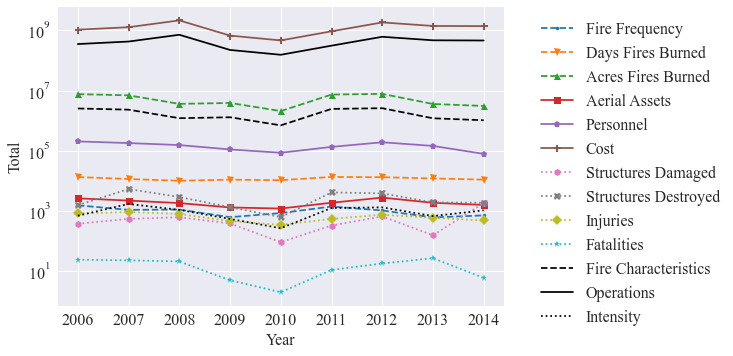

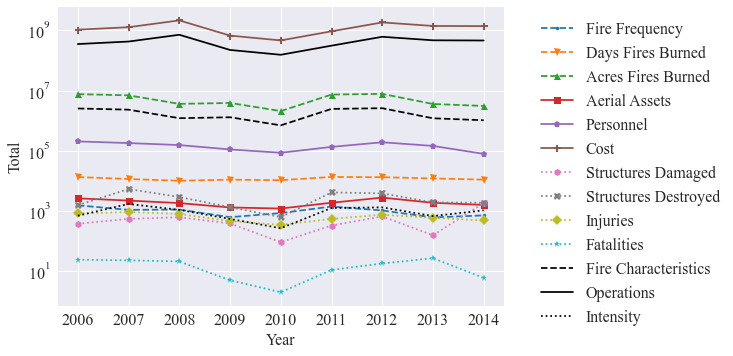

In [59]:
plt.figure()
plt.ylabel("Total", fontsize=16)
plt.xlabel("Year", fontsize=16)
#plt.title("Fire, Operations, and Intensity Trends from 2006-2014")
#years = [year.strip(".") for year in years]
for feature in totals:
    plt.plot(years, totals[feature], label=feature.replace("total ",""), linestyle=lines[feature], marker=markers[feature], color=colors_dict[feature])
    plt.tick_params(labelsize=16)
#plt.plot([],[], label='Fire Characteristics', color='black', linestyle='--')
#plt.plot([],[], label = 'Operations', color='black', linestyle = '-')
#plt.plot([],[], label = 'Intensity', color = 'black', linestyle = ':') 
plt.plot(years,combined_predictors_unscaled['Fire Characteristics'], label='Fire Characteristics', color='black', linestyle='--')
plt.plot(years,combined_predictors_unscaled['Operations'], label = 'Operations', color='black', linestyle = '-')
plt.plot(years,combined_predictors_unscaled['Intensity'], label = 'Intensity', color = 'black', linestyle = ':')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.yscale('log')
plt.show()

## Secondary Analysis:
- Correlation matrix
- Multiple Regression
- Risk Matrix

### Correlation Matrix

In [60]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(totals_scaled, fire_freqs_scaled, graph=False)

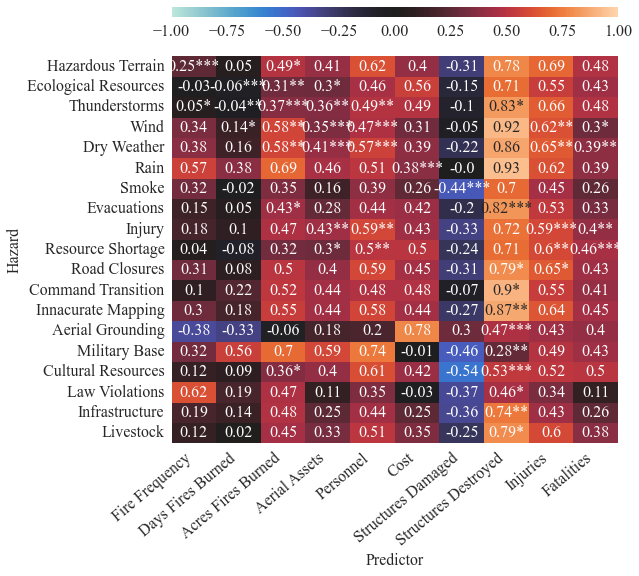

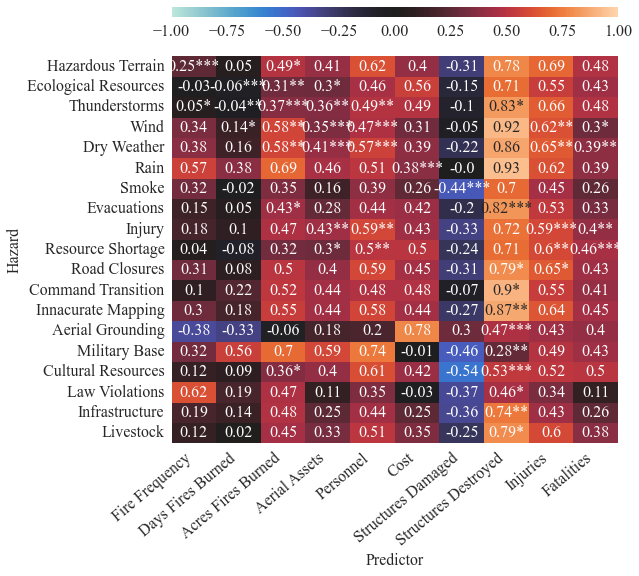

In [61]:
predictors = [p for p in totals_scaled]
hazards = [h for h in fire_freqs_scaled]
reshape_correlation_matrix(corrMatrix_fires, p_values, predictors, hazards)

In [62]:
#correlation_mat_total_fires

### Multiple regression
typically multiple regression is used as a prediction algorithm, given a certain set of continuous inputs X=(x1,2,...xn), what is the value of continuous variable y? Multiple regression uses a linear combination of X to produce y, and the error in y/goodness of fit indicates how good the predictors are.

The importance of a predictor, xi, is evaluated by shuffling its input values, and seeing how the goodness of fit/error changes.

#### Our goal: 
use regression to determine what the most important predictors are for the frequency of hazards. Since we have a limited number of data points (9) we will not be predicting on unseen data.

##### Inputs/Predictors: 
All operations trends, fire characteristics, and intensity
##### Output/y: 
annual frequency of hazards time series
##### Method:
for each hazard, use its frequency time series:
1. fit linear regression model to the X,y
2. calculate correlation coefficient
For each Xi:
3. Randomly shuffle the input values
4. Have the full model predict the y value
5. record correlation coefficient
5. record (orignal coefficient-shuffled xi coefficient) -> positive large delta means importance, negative delta indicates it should be removed, small delta means little importance

Future goal: use ML to determine whether or not a hazard will occur based on past incident reports

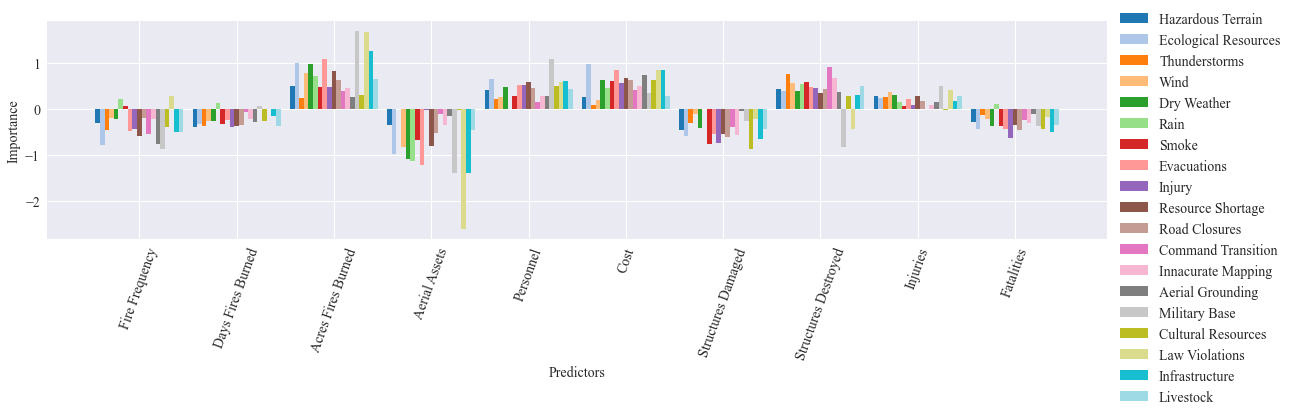

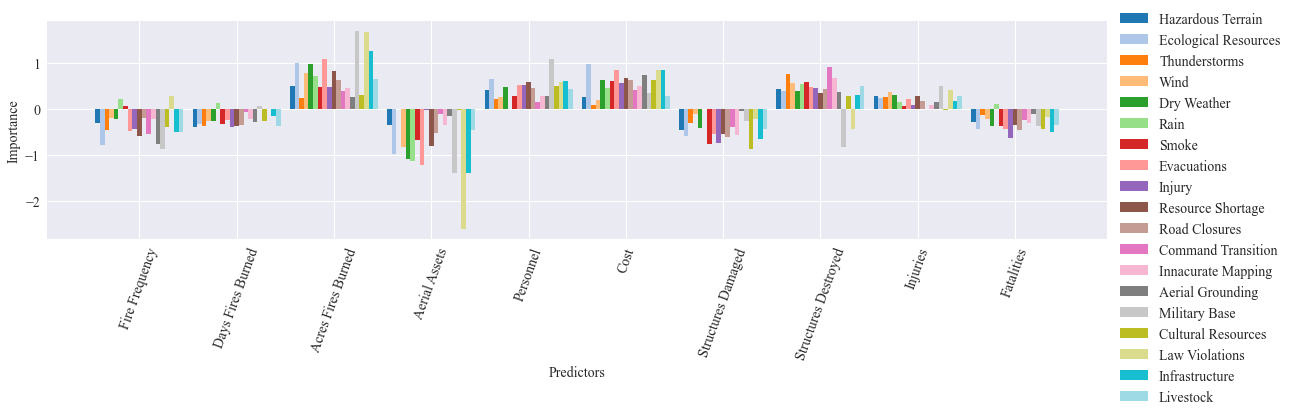

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Innacurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.680                                  0.206   
1                         -0.082                                  0.696   
2                          0.450                                  0.353   
3                          0.894                                  0.694   
4                          0.877                                  0.736   
5                          0.893                                  0.942   
6                          0.991                                  0.516   
7                          0.501                                  0.802   
8                          0.481                                  0.322   
9                          0.198                                  0.441   
10                         0.885                                  0.444   
11                         0.352                                  0.980   
12                         0.873                                  0.783   
13                        -0.176                                  0.723   
14                        -0.645                                  0.989   
15                         0.530                                  0.607   
16                         0.810                                  0.999   
17                         0.398                                  0.906   
18                         0.275                                  0.316   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                   -0.237                              0.553   
1                                   -1.720                             -1.004   
2                                    0.784                              1.000   
3                                   -1.538                             -1.166   
4                                   -2.479                             -2.215   
5                                   -0.920                             -2.795   
6                                    0.105                             -0.402   
7                                   -2.623                             -2.489   
8                                    0.088                              0.998   
9                                   -1.338                             -0.769   
10                                  -0.509                              0.163   
11                                   0.491                              0.970   
12                                   0.183                              0.624   
13                                   0.801

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Innacurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.680                                  0.206   
1                         -0.082                                  0.696   
2                          0.450                                  0.353   
3                          0.894                                  0.694   
4                          0.877                                  0.736   
5                          0.893                                  0.942   
6                          0.991                                  0.516   
7                          0.501                                  0.802   
8                          0.481                                  0.322   
9                          0.198                                  0.441   
10                         0.885                                  0.444   
11                         0.352                                  0.980   
12                         0.873                                  0.783   
13                        -0.176                                  0.723   
14                        -0.645                                  0.989   
15                         0.530                                  0.607   
16                         0.810                                  0.999   
17                         0.398                                  0.906   
18                         0.275                                  0.316   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                   -0.237                              0.553   
1                                   -1.720                             -1.004   
2                                    0.784                              1.000   
3                                   -1.538                             -1.166   
4                                   -2.479                             -2.215   
5                                   -0.920                             -2.795   
6                                    0.105                             -0.402   
7                                   -2.623                             -2.489   
8                                    0.088                              0.998   
9                                   -1.338                             -0.769   
10                                  -0.509                              0.163   
11                                   0.491                              0.970   
12                                   0.183                              0.624   
13                                   0.801

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Innacurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.320                                  0.794   
1                          1.082                                  0.304   
2                          0.550                                  0.647   
3                          0.106                                  0.306   
4                          0.123                                  0.264   
5                          0.107                                  0.058   
6                          0.009                                  0.484   
7                          0.499                                  0.198   
8                          0.519                                  0.678   
9                          0.802                                  0.559   
10                         0.115                                  0.556   
11                         0.648                                  0.020   
12                         0.127                                  0.217   
13                         1.176                                  0.277   
14                         1.645                                  0.011   
15                         0.470                                  0.393   
16                         0.190                                  0.001   
17                         0.602                                  0.094   
18                         0.725                                  0.684   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    1.237                              0.447   
1                                    2.720                              2.004   
2                                    0.216                              0.000   
3                                    2.538                              2.166   
4                                    3.479                              3.215   
5                                    1.920                              3.795   
6                                    0.895                              1.402   
7                                    3.623                              3.489   
8                                    0.912                              0.002   
9                                    2.338                              1.769   
10                                   1.509                              0.837   
11                                   0.509                              0.030   
12                                   0.817                              0.376   
13                                   0.199

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Innacurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.320                                  0.794   
1                          1.082                                  0.304   
2                          0.550                                  0.647   
3                          0.106                                  0.306   
4                          0.123                                  0.264   
5                          0.107                                  0.058   
6                          0.009                                  0.484   
7                          0.499                                  0.198   
8                          0.519                                  0.678   
9                          0.802                                  0.559   
10                         0.115                                  0.556   
11                         0.648                                  0.020   
12                         0.127                                  0.217   
13                         1.176                                  0.277   
14                         1.645                                  0.011   
15                         0.470                                  0.393   
16                         0.190                                  0.001   
17                         0.602                                  0.094   
18                         0.725                                  0.684   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    1.237                              0.447   
1                                    2.720                              2.004   
2                                    0.216                              0.000   
3                                    2.538                              2.166   
4                                    3.479                              3.215   
5                                    1.920                              3.795   
6                                    0.895                              1.402   
7                                    3.623                              3.489   
8                                    0.912                              0.002   
9                                    2.338                              1.769   
10                                   1.509                              0.837   
11                                   0.509                              0.030   
12                                   0.817                              0.376   
13                                   0.199

In [63]:
predictors = [p for p in totals_scaled]
hazards = [h.replace("total ","") for h in fire_freqs_scaled]
results_df, delta_df = multiple_reg_feature_importance(predictors, hazards, correlation_mat_total_fires)
display(results_df, delta_df)

In [64]:
cols = [col for col in delta_df.columns if "MSE" in col]
delta_df.drop(cols, axis=1)

hazard  R2 for full model  Fire Frequency removed score  \
0      Hazardous Terrain                1.0                         0.320   
1   Ecological Resources                1.0                         1.082   
2          Thunderstorms                1.0                         0.550   
3                   Wind                1.0                         0.106   
4            Dry Weather                1.0                         0.123   
5                   Rain                1.0                         0.107   
6                  Smoke                1.0                         0.009   
7            Evacuations                1.0                         0.499   
8                 Injury                1.0                         0.519   
9      Resource Shortage                1.0                         0.802   
10         Road Closures                1.0                         0.115   
11    Command Transition                1.0                         0.648   
12    Innacurate Mapping                1.0                         0.127   
13      Aerial Grounding                1.0                         1.176   
14         Military Base                1.0                         1.645   
15    Cultural Resources                1.0                         0.470   
16        Law Violations                1.0                         0.190   
17        Infrastructure                1.0                         0.602   
18             Livestock                1.0                         0.725   

    total Days Fires Burned removed score  \
0                                   0.794   
1                                   0.304   
2                                   0.647   
3                                   0.306   
4                                   0.264   
5                                   0.058   
6                                   0.484   
7                                   0.198   
8                                   0.678   
9                                   0.559   
10                                  0.556   
11                                  0.020   
12                                  0.217   
13                                  0.277   
14                                  0.011   
15                                  0.393   
16                                  0.001   
17                                  0.094   
18                                  0.684   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    1.237                              0.447   
1                                    2.720                              2.004   
2                                    0.216                              0.000   
3                                    2.538                              2.166   
4                                    3.479                              3.215   
5                                    1.920                              3.795   
6                                    0.895                              1.402   
7                                    3.623                              3.489   
8                                    0.912                              0.002   
9                                    2.338                              1.769   
10                                   1.509                              0.837   
11                                   0.509                              0.030   
12                                   0.817                              0.376   
13                                   0.199                              0.057   
14                                   9.206                              4.829   
15                                   0.447                              0.001   
16                                  10.595                             19.816   
17                                   5.407                              5.104   
18                                   

hazard  R2 for full model  Fire Frequency removed score  \
0      Hazardous Terrain                1.0                         0.320   
1   Ecological Resources                1.0                         1.082   
2          Thunderstorms                1.0                         0.550   
3                   Wind                1.0                         0.106   
4            Dry Weather                1.0                         0.123   
5                   Rain                1.0                         0.107   
6                  Smoke                1.0                         0.009   
7            Evacuations                1.0                         0.499   
8                 Injury                1.0                         0.519   
9      Resource Shortage                1.0                         0.802   
10         Road Closures                1.0                         0.115   
11    Command Transition                1.0                         0.648   
12    Innacurate Mapping                1.0                         0.127   
13      Aerial Grounding                1.0                         1.176   
14         Military Base                1.0                         1.645   
15    Cultural Resources                1.0                         0.470   
16        Law Violations                1.0                         0.190   
17        Infrastructure                1.0                         0.602   
18             Livestock                1.0                         0.725   

    total Days Fires Burned removed score  \
0                                   0.794   
1                                   0.304   
2                                   0.647   
3                                   0.306   
4                                   0.264   
5                                   0.058   
6                                   0.484   
7                                   0.198   
8                                   0.678   
9                                   0.559   
10                                  0.556   
11                                  0.020   
12                                  0.217   
13                                  0.277   
14                                  0.011   
15                                  0.393   
16                                  0.001   
17                                  0.094   
18                                  0.684   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    1.237                              0.447   
1                                    2.720                              2.004   
2                                    0.216                              0.000   
3                                    2.538                              2.166   
4                                    3.479                              3.215   
5                                    1.920                              3.795   
6                                    0.895                              1.402   
7                                    3.623                              3.489   
8                                    0.912                              0.002   
9                                    2.338                              1.769   
10                                   1.509                              0.837   
11                                   0.509                              0.030   
12                                   0.817                              0.376   
13                                   0.199                              0.057   
14                                   9.206                              4.829   
15                                   0.447                              0.001   
16                                  10.595                             19.816   
17                                   5.407                              5.104   
18                                   

### Combined Predictors

In [65]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(combined_predictors_scaled, fire_freqs_scaled, graph=False)

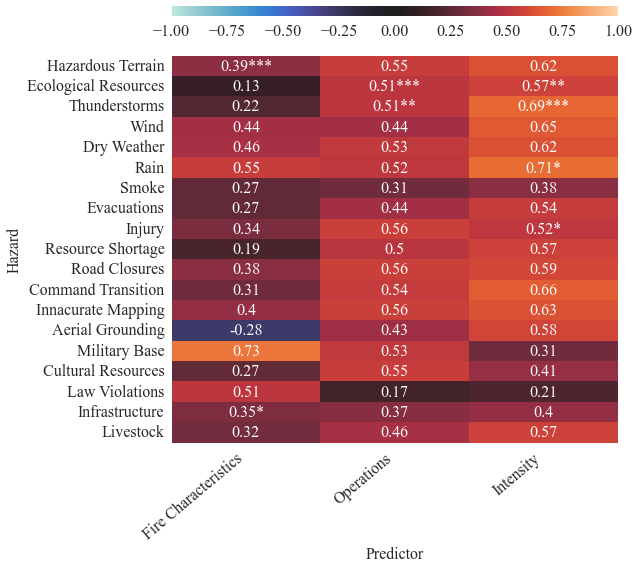

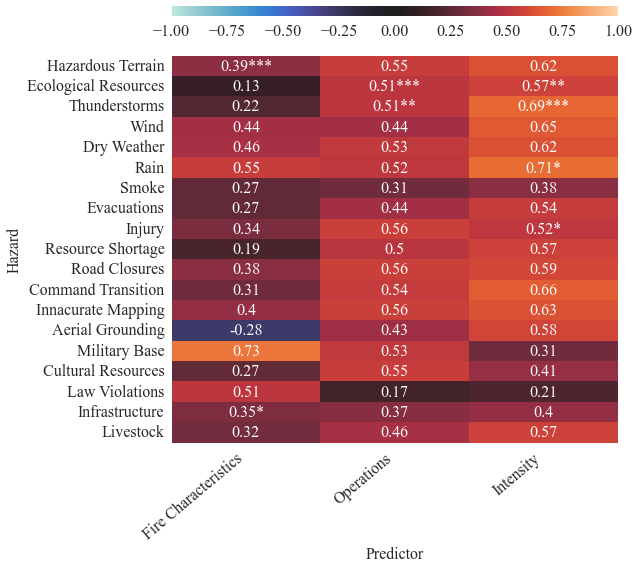

In [67]:
predictors = [p for p in combined_predictors_scaled]
hazards = [h for h in fire_freqs_scaled]
reshape_correlation_matrix(corrMatrix_fires, p_values, predictors, hazards)

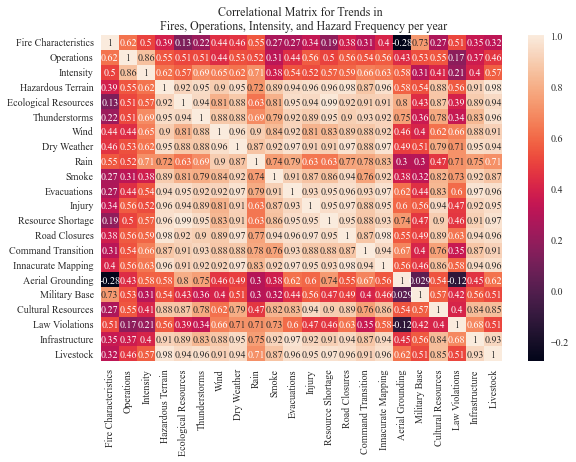

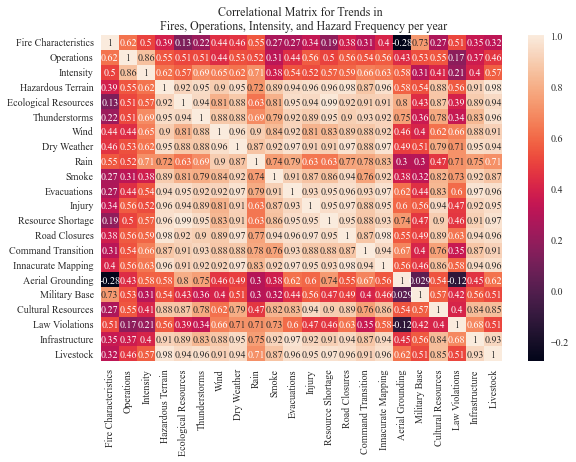

In [68]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(combined_predictors_scaled, fire_freqs_scaled, graph=True, figsize=(9,6))

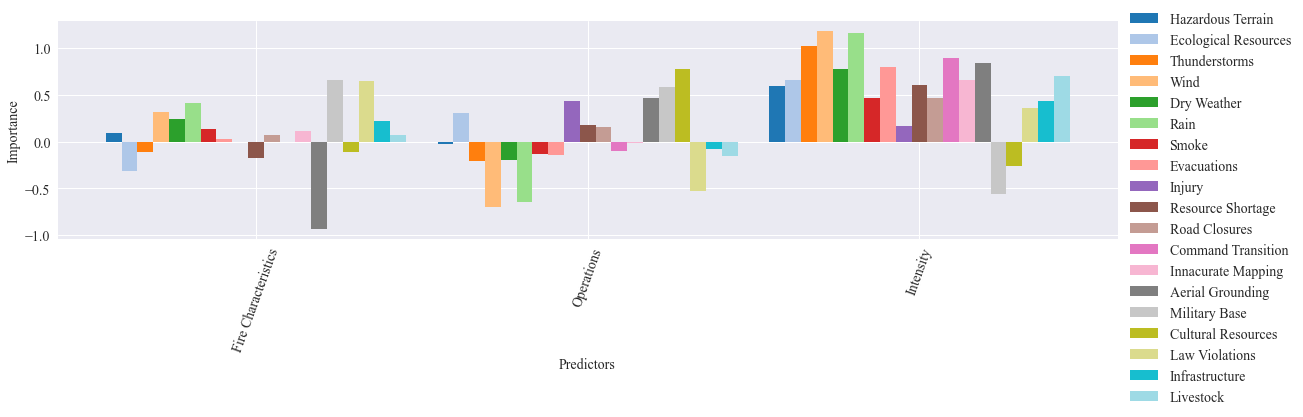

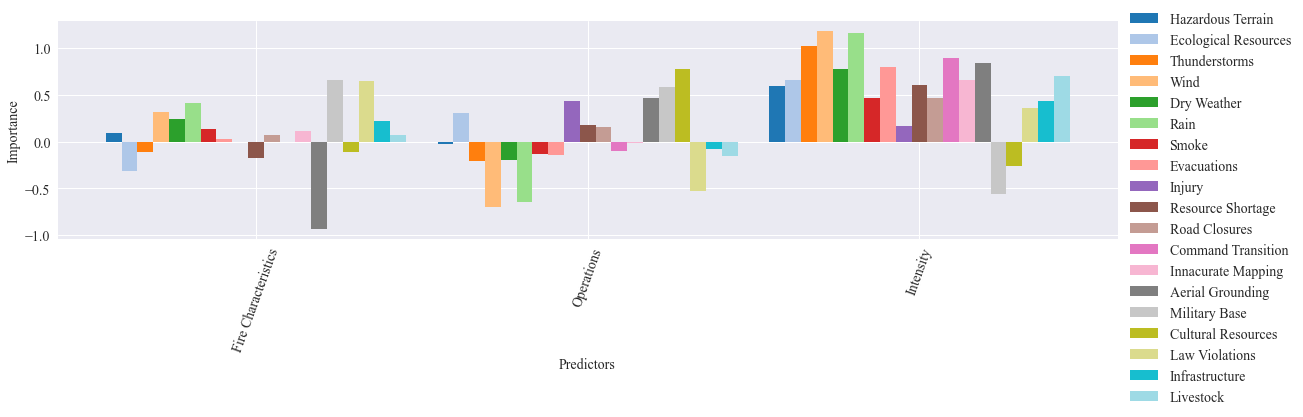

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain              0.398               0.048   
1   Ecological Resources              0.377               0.089   
2          Thunderstorms              0.511               0.047   
3                   Wind              0.552               0.042   
4            Dry Weather              0.426               0.062   
5                   Rain              0.639               0.036   
6                  Smoke              0.154               0.084   
7            Evacuations              0.301               0.087   
8                 Injury              0.323               0.067   
9      Resource Shortage              0.347               0.072   
10         Road Closures              0.358               0.064   
11    Command Transition              0.437               0.066   
12    Innacurate Mapping              0.412               0.059   
13      Aerial Grounding              0.793               0.027   
14         Military Base              0.600               0.048   
15    Cultural Resources              0.328               0.055   
16        Law Violations              0.320               0.069   
17        Infrastructure              0.192               0.092   
18             Livestock              0.336               0.059   

    Fire Characteristics removed score  Operations removed score  \
0                                0.409                     0.406   
1                                0.039                     0.123   
2                                0.450                     0.471   
3                                0.351                    -0.748   
4                                0.367                     0.361   
5                                0.145                    -0.455   
6                                0.129                     0.161   
7                                0.311                     0.287   
8                                0.320                    -0.393   
9                                0.173                     0.212   
10                               0.369                     0.240   
11                               0.437                     0.450   
12                               0.392                     0.417   
13                              -1.452                     0.303   
14                               0.014                    -0.170   
15                               0.246                    -2.172   
16                              -0.475                    -0.532   
17                               0.173                     0.198   
18                               0.354                     0.322   

    Intensity removed score  Fire Characteristics removed MSE  \
0                    -0.237                             0.047   
1                    -0.113                             0.138   
2                    -1.205                             0.053   
3                    -1.659                             0.061   
4                    -0.381                             0.068   
5                    -1.419                             0.086   
6                    -0.146                             0.086   
7                    -0.505                             0.086   
8                     0.276                             0.067   
9                    -0.158                             0.091   
10                    0.051                             0.062   
11                   -0.789                             0.066   
12                   -0.271                             0.061   
13                   -0.084                             0.321   
14                    0.230                             0.118   
15                    0.216                             0.061   
16                    0.213                             0.150   
17                   -0.079                             0.094   
18                   -0.529                             0.057   

    Operations 

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain              0.398               0.048   
1   Ecological Resources              0.377               0.089   
2          Thunderstorms              0.511               0.047   
3                   Wind              0.552               0.042   
4            Dry Weather              0.426               0.062   
5                   Rain              0.639               0.036   
6                  Smoke              0.154               0.084   
7            Evacuations              0.301               0.087   
8                 Injury              0.323               0.067   
9      Resource Shortage              0.347               0.072   
10         Road Closures              0.358               0.064   
11    Command Transition              0.437               0.066   
12    Innacurate Mapping              0.412               0.059   
13      Aerial Grounding              0.793               0.027   
14         Military Base              0.600               0.048   
15    Cultural Resources              0.328               0.055   
16        Law Violations              0.320               0.069   
17        Infrastructure              0.192               0.092   
18             Livestock              0.336               0.059   

    Fire Characteristics removed score  Operations removed score  \
0                                0.010                     0.008   
1                                0.338                     0.254   
2                                0.061                     0.040   
3                                0.201                     1.301   
4                                0.059                     0.065   
5                                0.495                     1.094   
6                                0.025                     0.007   
7                                0.010                     0.013   
8                                0.003                     0.716   
9                                0.174                     0.134   
10                               0.011                     0.118   
11                               0.000                     0.013   
12                               0.021                     0.005   
13                               2.245                     0.489   
14                               0.587                     0.771   
15                               0.082                     2.500   
16                               0.795                     0.852   
17                               0.019                     0.006   
18                               0.018                     0.013   

    Intensity removed score  Fire Characteristics removed MSE  \
0                     0.636                             0.001   
1                     0.490                            -0.049   
2                     1.716                            -0.006   
3                     2.211                            -0.019   
4                     0.807                            -0.006   
5                     2.059                            -0.050   
6                     0.300                            -0.002   
7                     0.805                             0.001   
8                     0.048                            -0.000   
9                     0.505                            -0.019   
10                    0.307                             0.001   
11                    1.226                            -0.000   
12                    0.684                            -0.002   
13                    0.877                            -0.294   
14                    0.370                            -0.070   
15                    0.112                            -0.007   
16                    0.106                            -0.081   
17                    0.272                            -0.002   
18                    0.864                             0.002   

    Operations 

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain              0.398               0.048   
1   Ecological Resources              0.377               0.089   
2          Thunderstorms              0.511               0.047   
3                   Wind              0.552               0.042   
4            Dry Weather              0.426               0.062   
5                   Rain              0.639               0.036   
6                  Smoke              0.154               0.084   
7            Evacuations              0.301               0.087   
8                 Injury              0.323               0.067   
9      Resource Shortage              0.347               0.072   
10         Road Closures              0.358               0.064   
11    Command Transition              0.437               0.066   
12    Innacurate Mapping              0.412               0.059   
13      Aerial Grounding              0.793               0.027   
14         Military Base              0.600               0.048   
15    Cultural Resources              0.328               0.055   
16        Law Violations              0.320               0.069   
17        Infrastructure              0.192               0.092   
18             Livestock              0.336               0.059   

    Fire Characteristics removed score  Operations removed score  \
0                                0.409                     0.406   
1                                0.039                     0.123   
2                                0.450                     0.471   
3                                0.351                    -0.748   
4                                0.367                     0.361   
5                                0.145                    -0.455   
6                                0.129                     0.161   
7                                0.311                     0.287   
8                                0.320                    -0.393   
9                                0.173                     0.212   
10                               0.369                     0.240   
11                               0.437                     0.450   
12                               0.392                     0.417   
13                              -1.452                     0.303   
14                               0.014                    -0.170   
15                               0.246                    -2.172   
16                              -0.475                    -0.532   
17                               0.173                     0.198   
18                               0.354                     0.322   

    Intensity removed score  Fire Characteristics removed MSE  \
0                    -0.237                             0.047   
1                    -0.113                             0.138   
2                    -1.205                             0.053   
3                    -1.659                             0.061   
4                    -0.381                             0.068   
5                    -1.419                             0.086   
6                    -0.146                             0.086   
7                    -0.505                             0.086   
8                     0.276                             0.067   
9                    -0.158                             0.091   
10                    0.051                             0.062   
11                   -0.789                             0.066   
12                   -0.271                             0.061   
13                   -0.084                             0.321   
14                    0.230                             0.118   
15                    0.216                             0.061   
16                    0.213                             0.150   
17                   -0.079                             0.094   
18                   -0.529                             0.057   

    Operations 

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain              0.398               0.048   
1   Ecological Resources              0.377               0.089   
2          Thunderstorms              0.511               0.047   
3                   Wind              0.552               0.042   
4            Dry Weather              0.426               0.062   
5                   Rain              0.639               0.036   
6                  Smoke              0.154               0.084   
7            Evacuations              0.301               0.087   
8                 Injury              0.323               0.067   
9      Resource Shortage              0.347               0.072   
10         Road Closures              0.358               0.064   
11    Command Transition              0.437               0.066   
12    Innacurate Mapping              0.412               0.059   
13      Aerial Grounding              0.793               0.027   
14         Military Base              0.600               0.048   
15    Cultural Resources              0.328               0.055   
16        Law Violations              0.320               0.069   
17        Infrastructure              0.192               0.092   
18             Livestock              0.336               0.059   

    Fire Characteristics removed score  Operations removed score  \
0                                0.010                     0.008   
1                                0.338                     0.254   
2                                0.061                     0.040   
3                                0.201                     1.301   
4                                0.059                     0.065   
5                                0.495                     1.094   
6                                0.025                     0.007   
7                                0.010                     0.013   
8                                0.003                     0.716   
9                                0.174                     0.134   
10                               0.011                     0.118   
11                               0.000                     0.013   
12                               0.021                     0.005   
13                               2.245                     0.489   
14                               0.587                     0.771   
15                               0.082                     2.500   
16                               0.795                     0.852   
17                               0.019                     0.006   
18                               0.018                     0.013   

    Intensity removed score  Fire Characteristics removed MSE  \
0                     0.636                             0.001   
1                     0.490                            -0.049   
2                     1.716                            -0.006   
3                     2.211                            -0.019   
4                     0.807                            -0.006   
5                     2.059                            -0.050   
6                     0.300                            -0.002   
7                     0.805                             0.001   
8                     0.048                            -0.000   
9                     0.505                            -0.019   
10                    0.307                             0.001   
11                    1.226                            -0.000   
12                    0.684                            -0.002   
13                    0.877                            -0.294   
14                    0.370                            -0.070   
15                    0.112                            -0.007   
16                    0.106                            -0.081   
17                    0.272                            -0.002   
18                    0.864                             0.002   

    Operations 

In [69]:
predictors = [p for p in combined_predictors_scaled]
hazards = [h.replace("total ","") for h in fire_freqs_scaled]
results_df, delta_df = multiple_reg_feature_importance(predictors, hazards, correlation_mat_total_fires)
display(results_df, delta_df)

### Risk Matrix of Hazards (rate by severity)

In [70]:
matplotlib.style.use("default")

In [71]:
from module.In_time_risk_matrix_class import  In_Time_Risk_Matrix

C:\Users\srandrad\Anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:47: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  min_version = LooseVersion(INCLUSIVE_MIN_TF_VERSION)
C:\Users\srandrad\Anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:48: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  max_version = LooseVersion(EXCLUSIVE_MAX_TF_VERSION)
C:\Users\srandrad\Anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if min_version <= LooseVersion(tf.__version__) < max_version:
C:\Users\srandrad\Anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:47: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  min_version = LooseVersion(INCLUSIVE_MIN_TF_VERSION)
C:\Users\srandrad\A

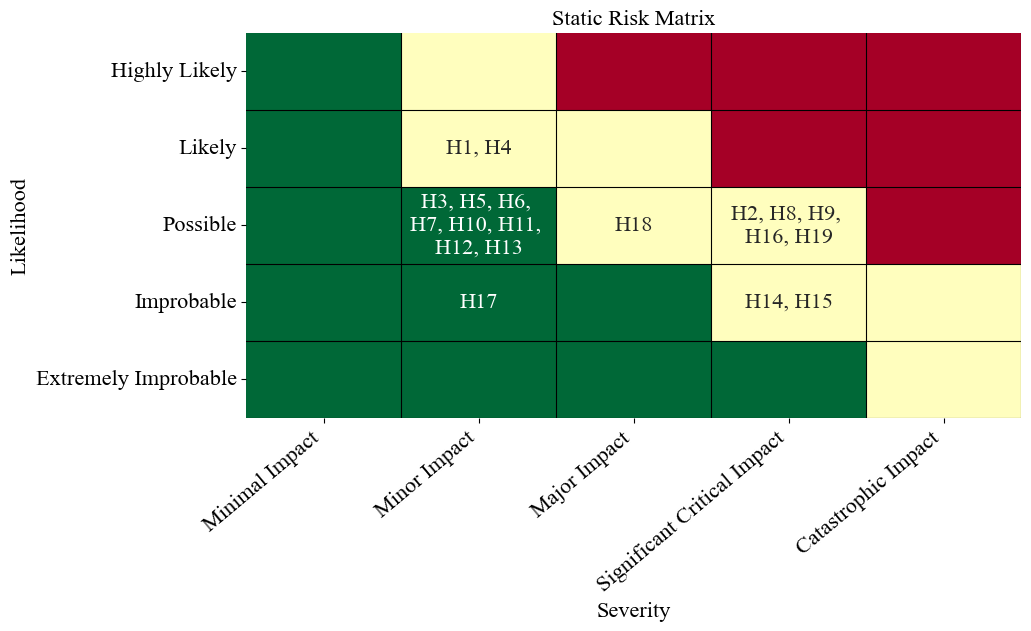

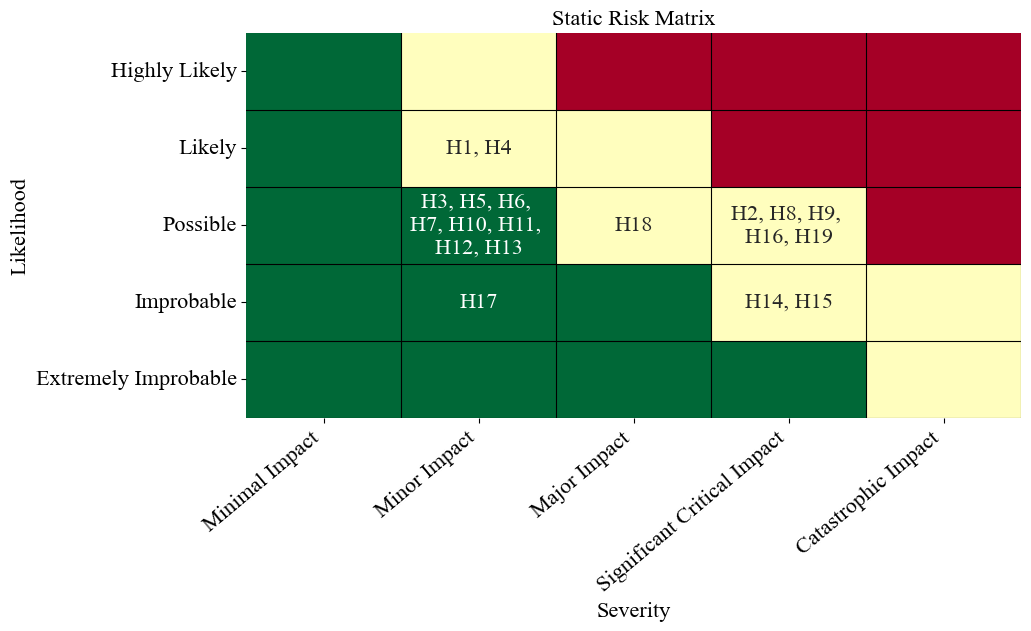

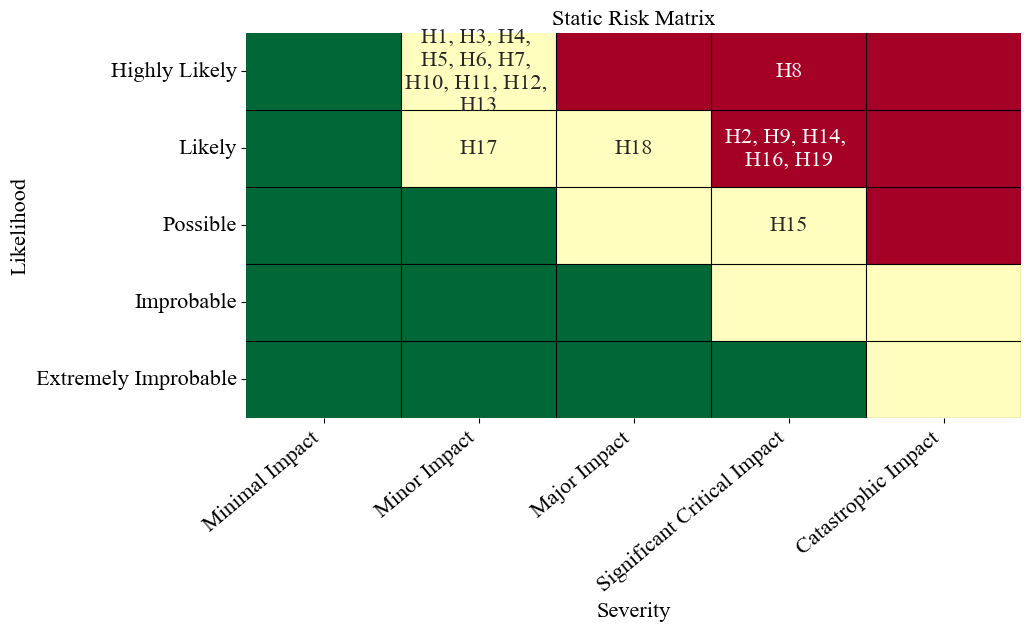

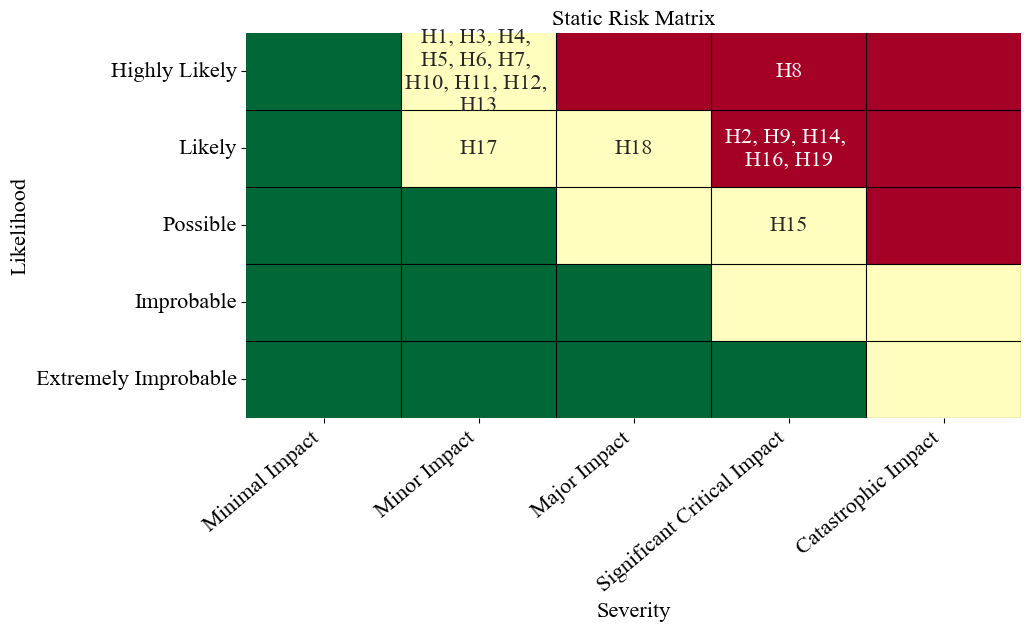

In [72]:
rm = In_Time_Risk_Matrix(num_severity_models=0, num_likelihood_models=0, hazards=hazards)
probs_df = rm.calc_static_likelihoods(frequency_fires, total_fires=len(incident_summary_df))
severity_df = rm.calc_static_severity(severity_table)
rm.build_static_risk_matrix(severity_df, probs_df, figsize=(10,5))

rates_df = rm.calc_static_likelihoods_rates(frequency_fires)
rm.build_static_risk_matrix(severity_df, rates_df, rates=True, save=False,  figsize=(10,5))

In [73]:
severity_df

Hazardous Terrain  Ecological Resources  \
Diff_Injuries                          1.000                 3.000   
Diff_Structures_Damages                0.793                 1.540   
Diff_Structures_Destroyed              4.547                 6.371   
Diff_Fatalities                        0.000                 0.000   

                           Thunderstorms   Wind  Dry Weather   Rain  Smoke  \
Diff_Injuries                      2.000  1.000        2.000  1.000  2.000   
Diff_Structures_Damages            1.100  1.119        1.427  1.189  1.422   
Diff_Structures_Destroyed          5.047  6.156        7.592  4.975  7.564   
Diff_Fatalities                    0.000  0.000        0.000  0.000  0.000   

                           Evacuations  Injury  Resource Shortage  \
Diff_Injuries                    3.000   4.000              2.000   
Diff_Structures_Damages          2.487   1.941              1.545   
Diff_Structures_Destroyed       14.562  14.144              8.372   
Diff_Fatalities                  0.000   0.000              0.000   

                           Road Closures  Command Transition  \
Diff_Injuries                      2.000               2.000   
Diff_Structures_Damages            1.868               1.714   
Diff_Structures_Destroyed          9.919               9.128   
Diff_Fatalities                    0.000               0.000   

                           Innacurate Mapping  Aerial Grounding  \
Diff_Injuries                           2.000             6.000   
Diff_Structures_Damages                 1.016             5.282   
Diff_Structures_Destroyed               5.675            10.403   
Diff_Fatalities                         0.000             0.000   

                           Military Base  Cultural Resources  Law Violations  \
Diff_Injuries                      3.000               3.000           1.000   
Diff_Structures_Damages            1.060               1.457           1.527   
Diff_Structures_Destroyed         17.639              10.503           7.890   
Diff_Fatalities                    0.000               0.000           0.000   

                           Infrastructure  Livestock  
Diff_Injuries                       2.000      3.000  
Diff_Structures_Damages             2.641      0.938  
Diff_Structures_Destroyed          15.509     11.826  
Diff_Fatalities                     0.000      0.000

Hazardous Terrain  Ecological Resources  \
Diff_Injuries                          1.000                 3.000   
Diff_Structures_Damages                0.793                 1.540   
Diff_Structures_Destroyed              4.547                 6.371   
Diff_Fatalities                        0.000                 0.000   

                           Thunderstorms   Wind  Dry Weather   Rain  Smoke  \
Diff_Injuries                      2.000  1.000        2.000  1.000  2.000   
Diff_Structures_Damages            1.100  1.119        1.427  1.189  1.422   
Diff_Structures_Destroyed          5.047  6.156        7.592  4.975  7.564   
Diff_Fatalities                    0.000  0.000        0.000  0.000  0.000   

                           Evacuations  Injury  Resource Shortage  \
Diff_Injuries                    3.000   4.000              2.000   
Diff_Structures_Damages          2.487   1.941              1.545   
Diff_Structures_Destroyed       14.562  14.144              8.372   
Diff_Fatalities                  0.000   0.000              0.000   

                           Road Closures  Command Transition  \
Diff_Injuries                      2.000               2.000   
Diff_Structures_Damages            1.868               1.714   
Diff_Structures_Destroyed          9.919               9.128   
Diff_Fatalities                    0.000               0.000   

                           Innacurate Mapping  Aerial Grounding  \
Diff_Injuries                           2.000             6.000   
Diff_Structures_Damages                 1.016             5.282   
Diff_Structures_Destroyed               5.675            10.403   
Diff_Fatalities                         0.000             0.000   

                           Military Base  Cultural Resources  Law Violations  \
Diff_Injuries                      3.000               3.000           1.000   
Diff_Structures_Damages            1.060               1.457           1.527   
Diff_Structures_Destroyed         17.639              10.503           7.890   
Diff_Fatalities                    0.000               0.000           0.000   

                           Infrastructure  Livestock  
Diff_Injuries                       2.000      3.000  
Diff_Structures_Damages             2.641      0.938  
Diff_Structures_Destroyed          15.509     11.826  
Diff_Fatalities                     0.000      0.000

In [74]:
#rates_dict = {hazard: rates_df.at[0,hazard] for hazard in rates_df}
#severities
#plot_risk_matrix(rates_df.to_dict(), severity_df.to_dict(), figsize=(9,5), save=False)

In [75]:
rates_df.to_dict()

{'Hazardous Terrain': {0: 322},
 'Ecological Resources': {0: 88},
 'Thunderstorms': {0: 125},
 'Wind': {0: 328},
 'Dry Weather': {0: 241},
 'Rain': {0: 188},
 'Smoke': {0: 142},
 'Evacuations': {0: 144},
 'Injury': {0: 87},
 'Resource Shortage': {0: 137},
 'Road Closures': {0: 192},
 'Command Transition': {0: 208},
 'Innacurate Mapping': {0: 154},
 'Aerial Grounding': {0: 17},
 'Military Base': {0: 9},
 'Cultural Resources': {0: 96},
 'Law Violations': {0: 36},
 'Infrastructure': {0: 97},
 'Livestock': {0: 59}}

{'Hazardous Terrain': {0: 322},
 'Ecological Resources': {0: 88},
 'Thunderstorms': {0: 125},
 'Wind': {0: 328},
 'Dry Weather': {0: 241},
 'Rain': {0: 188},
 'Smoke': {0: 142},
 'Evacuations': {0: 144},
 'Injury': {0: 87},
 'Resource Shortage': {0: 137},
 'Road Closures': {0: 192},
 'Command Transition': {0: 208},
 'Innacurate Mapping': {0: 154},
 'Aerial Grounding': {0: 17},
 'Military Base': {0: 9},
 'Cultural Resources': {0: 96},
 'Law Violations': {0: 36},
 'Infrastructure': {0: 97},
 'Livestock': {0: 59}}

# Experimental

In [76]:
totals_new = {predictor: totals_scaled[predictor] for predictor in totals_scaled if predictor not in ["total Structures Damaged", "total Structures Destroyed"]}
totals_new["total structure"] = minmax_scale([totals["total Structures Damaged"][i]+totals["total Structures Destroyed"][i] for i in range(len(totals["total Structures Destroyed"]))])

TypeError: 'dict_values' object is not subscriptable

TypeError: 'dict_values' object is not subscriptable

In [ ]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(totals_new, fire_freqs_scaled, graph=False)

In [ ]:
correlation_mat_total_fires

In [ ]:
predictors = [p for p in totals_new]
hazards = ["total "+h for h in fire_freqs_scaled]
reshape_correlation_matrix(corrMatrix_fires, p_values, predictors, hazards)

In [ ]:
predictors = [p for p in totals_new]
hazards = [h.replace("total ","") for h in fire_freqs_scaled]
results_df, delta_df = multiple_reg_feature_importance(predictors, hazards, correlation_mat_total_fires)
display(results_df, delta_df)

# Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
input_df = pd.DataFrame({predictor:totals_new[predictor] for predictor in totals_new})
vif_data["feature"] = input_df.columns
vif_data["VIF"] = [variance_inflation_factor(input_df.values, i)
                          for i in range(len(input_df.columns))]
vif_data

In [ ]:
vif_data = pd.DataFrame()
input_df = pd.DataFrame({predictor:combined_predictors_scaled[predictor] for predictor in combined_predictors_scaled})
vif_data["feature"] = input_df.columns
vif_data["VIF"] = [variance_inflation_factor(input_df.values, i)
                          for i in range(len(input_df.columns))]
vif_data

In [ ]:
sums = []
for col in input_df:
    temp_input = input_df.drop(col, axis=1)
    vif_data = pd.DataFrame()
    vif_data["feature"] = temp_input.columns
    vif_data["VIF"] = [variance_inflation_factor(temp_input.values, i)
                          for i in range(len(temp_input.columns))]
    sum_vif = sum(vif_data["VIF"].tolist())
    sums.append(sum_vif)
    display(col,sum_vif, vif_data)
print(min(sums), sums.index(min(sums)), predictors[sums.index(min(sums))])

In [ ]:
# to_drop = ["total Acres Fires Burned", "total Personnel", "total Injuries", "total Aerial Assets", "total Cost"]#,"total Days Fires Burned"]
# temp_input = input_df.drop(to_drop, axis=1)
# vif_data = pd.DataFrame()
# vif_data["feature"] = temp_input.columns
# vif_data["VIF"] = [variance_inflation_factor(temp_input.values, i)
#                       for i in range(len(temp_input.columns))]
# sum_vif = sum(vif_data["VIF"].tolist())
# display(sum_vif, vif_data)

In [77]:
avg_injuries = round(np.average(injuries_all))
avg_fatalities = round(np.average(fatalities_all))
avg_des = round(np.average(str_des_all))
avg_dam = round(np.average(str_dam_all))
avg_df = pd.DataFrame({"Total Avg Injuries":[avg_injuries for hazard in hazards],
                     "Total Avg Fatalities":[avg_fatalities for hazard in hazards],
                     "Total Avg Str Dam":[avg_dam for hazard in hazards],
                     "Total Avg Str Des":[avg_des for hazard in hazards]})

In [78]:
ICS_results = pd.concat([pd.DataFrame(table_data), severity_table, avg_df], axis=1)
ICS_results.to_csv(os.path.join(os.path.dirname(os.getcwd()),'results','ICS_hazards_journal.csv'))

In [79]:
avg_injuries = round(np.average(injuries_all))
avg_fatalities = round(np.average(fatalities_all))
avg_des = round(np.average(str_des_all))
avg_dam = round(np.average(str_dam_all))
avg_df = pd.DataFrame({"Total Avg Injuries":[avg_injuries for hazard in hazards],
                     "Total Avg Fatalities":[avg_fatalities for hazard in hazards],
                     "Total Avg Str Dam":[avg_dam for hazard in hazards],
                     "Total Avg Str Des":[avg_des for hazard in hazards]})

ICS_results = pd.concat([pd.DataFrame(table_data), severity_table, avg_df], axis=1)
ICS_results.to_csv(os.path.join(os.path.dirname(os.getcwd()),'results','ICS_hazards.csv'))